# Statistics Learning Final Assignment
Prepared by:
- Lyu Yaxing
- Ng Rui Qi



<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;'>Table of Contents</p>
<ol class="decimal_type" style="margin-left: 8px;">
    <li>Import Libraries</li>
    <li>Data Preprocessing<ol style="list-style-type: lower-alpha;">
            <li>Gathering basic information of data</li>
            <li>check missing values</li>
            <li>Missing Value Filling</li>
            <li>Feature Engineering</li>
        </ol>
    </li>
</ol>

# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #version 3.7.2
import seaborn as sns  
from sklearn.impute import KNNImputer
from sklearn.preprocessing import TargetEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mutual_info_score, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import joblib
from skopt import BayesSearchCV
from scipy.stats import skew, kurtosis, pearsonr
from scipy.special import boxcox1p
from sklearn.ensemble import VotingRegressor
from skopt.space import Real





pd.options.display.max_columns=100
pd.options.display.max_rows=100

<table style="border-collapse:collapse;border:none;">
    <tbody>
        <tr>
            <td style="width: 157.95pt;border: 1pt solid windowtext;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;line-height:normal;'>Library</p>
            </td>
            <td style="width: 166.05pt;border-top: 1pt solid windowtext;border-right: 1pt solid windowtext;border-bottom: 1pt solid windowtext;border-image: initial;border-left: none;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;line-height:normal;'>Description</p>
            </td>
            <td style="width: 143.5pt;border-top: 1pt solid windowtext;border-right: 1pt solid windowtext;border-bottom: 1pt solid windowtext;border-image: initial;border-left: none;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;line-height:normal;'>Version</p>
            </td>
        </tr>
        <tr>
            <td style="width: 157.95pt;border-right: 1pt solid windowtext;border-bottom: 1pt solid windowtext;border-left: 1pt solid windowtext;border-image: initial;border-top: none;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;line-height:normal;'>&nbsp;</p>
            </td>
            <td style="width: 166.05pt;border-top: none;border-left: none;border-bottom: 1pt solid windowtext;border-right: 1pt solid windowtext;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;line-height:normal;'>&nbsp;</p>
            </td>
            <td style="width: 143.5pt;border-top: none;border-left: none;border-bottom: 1pt solid windowtext;border-right: 1pt solid windowtext;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;line-height:normal;'>&nbsp;</p>
            </td>
        </tr>
        <tr>
            <td style="width: 157.95pt;border-right: 1pt solid windowtext;border-bottom: 1pt solid windowtext;border-left: 1pt solid windowtext;border-image: initial;border-top: none;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;line-height:normal;'>&nbsp;</p>
            </td>
            <td style="width: 166.05pt;border-top: none;border-left: none;border-bottom: 1pt solid windowtext;border-right: 1pt solid windowtext;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;line-height:normal;'>&nbsp;</p>
            </td>
            <td style="width: 143.5pt;border-top: none;border-left: none;border-bottom: 1pt solid windowtext;border-right: 1pt solid windowtext;padding: 0cm 5.4pt;vertical-align: top;">
                <p style='margin-top:0cm;margin-right:0cm;margin-bottom:0cm;margin-left:0cm;font-size:12.0pt;font-family:"Times New Roman",serif;line-height:normal;'>&nbsp;</p>
            </td>
        </tr>
    </tbody>
</table>

Note: I will put in once we finalized the library used


# 2. Data preprocessing

##  a. Gathering basic information about the data

In [3]:
# Upload the dataset
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

# Combine data for EDA
train['dataset'] = 'train'
test['dataset'] = 'test'
combined = pd.concat([train, test], ignore_index=True)

# Save all the merged data sets
combined.to_csv('./house-prices-advanced-regression-techniques/All_Data.csv', index=False)

## Step 1
Both train, test dataset is load into the program

* The reason we are merge this datset is to perform missing value filling in the later steps.

## Step 2
Save the merged dataset as a new csv documents.



Conducting exploratory data analysis (EDA) helps to fully understand the overall characteristics of the data, such as data distribution, missing values, outliers, and so on.
A column of the dataset is added to the end of the data to ensure that the dataset is separated before the model is trained.


In [4]:
# Ignore the 'ID' and 'dataset' fields for EDA and factor analysis
combined_features = combined.drop(columns=['Id', 'dataset'])
combined_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
combined_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

### Key insights:
According to the information above, we know that there is total of 2919 items in the dataset.

In the dataset, there are about *80* columns, which are 80 attributes. Among these 80 attributes, there are about 12 floats, 25 integers and 43 object datatypes. 

To summarize, there is about 37 numerical attributes and 43 object attributes.
This mean that the dataset is heavily based on non nu,erical attribute. Thus, it is important to use method such as one code hot encoding to translate these attributes into meaningful numerical values.


* Preparing all numerical and non numerical attributes, their meaning, representing and other remarks 

In [6]:
combined_features.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


From above information, show us that a series of important parameter such as
- There are some attributes that have less than 2919 item
    * Example such as, 
        * LotFrontage
        * MasVnrArea 
        * BsmtFinSF1 
        * BsmtFinSF2 
        * BsmtUnfSF
        * TotalBsmtSF
        * BsmtFullBath
and many more.

From the analysis, it is safe to say that it is neccessary to either drop or fill in the missing values in the topic. <br>
In our case, to preserve as much data as possible, mean average values is used for low percentage missing value attributes and those with high percentage missing values attributes will be dropped. 
<br>Further analysis will be done in the next section.

## b. Checking missing values

In this seection, A code have been written to check the percentage of the missing values in the attribute above.<br>
A table will be generated with descending order to verify if the percentage of a missing value.<br>
For a attribute to be considered as high percentage of missing values, it should have <50% of missing values.


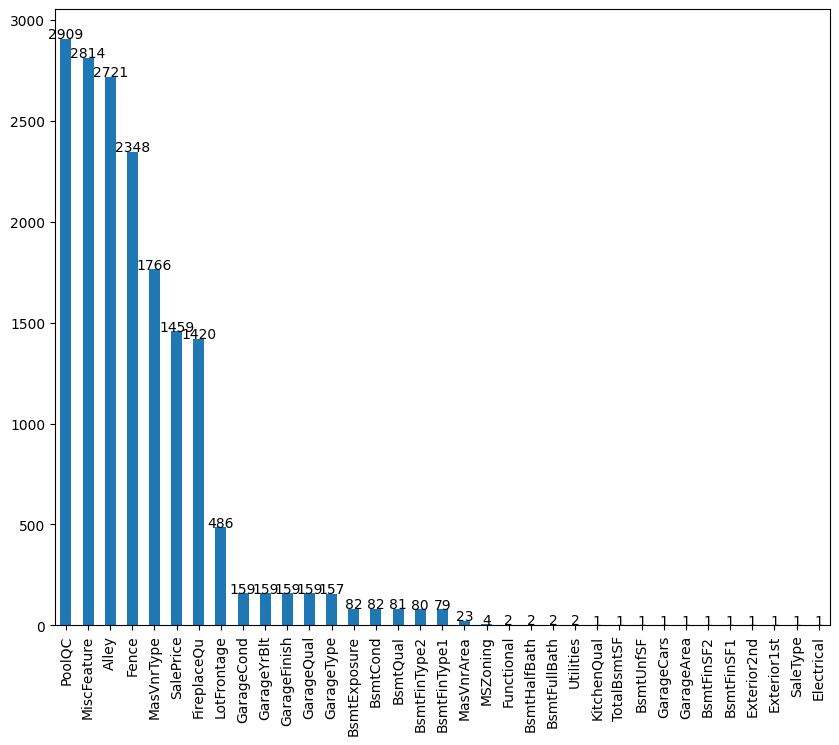

In [7]:
missing = combined_features.isnull().sum()
missing = missing[missing >0]
missing.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(10,8))
missing.plot.bar()

#Add data values at the end of each bar
for i, value in enumerate(missing):
    plt.text(i, value+1, str(value),ha='center')
    
plt.show()

In [8]:
#missing data percent plot
# for better visualization
total = combined_features.isnull().sum().sort_values(ascending=False)
percent = (combined_features.isnull().sum()/combined_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
MasVnrType,1766,0.605002
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471


### Key insights:
The dataset contain missing values
Some variables such as 'PoolQC', 'MiscFeature',''Alley,'Fence', 'MasVnrType', 'Fireplace' contain more than nearly half of missing values. Thus we should to drop those columns from data set.
### Reasons for High Missing Values in Certain Variables
1. Uncommon Features: Many of the variables with high missing values involve uncommon features or amenities (such as swimming pools, special features, fireplaces, etc.). These features are not present in every house, leading to a high proportion of missing values.

2. Incomplete Records: During the data recording process, there might be incomplete records due to time, cost, or other constraints, resulting in missing information for some variables.

3. None value: A missing data might represent the None(NAN) which is alreeady meaningful in the dataset. Thus, it requires careful analysis toward the attributes.

These factors contribute to the high percentage of missing values in these specific columns.

### Next Steps
1. Drop Columns with High Missing Values: Due to the high percentage of missing values, retaining these columns may introduce noise and affect the analysis results. Therefore, these columns should be removed.

2. Use More Complete Data: Use the remaining data for analysis to ensure the reliability and accuracy of the analysis.


In [9]:
# Dropping columns with much missing values
columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']
combined_features = combined_features.drop(columns,axis=1)

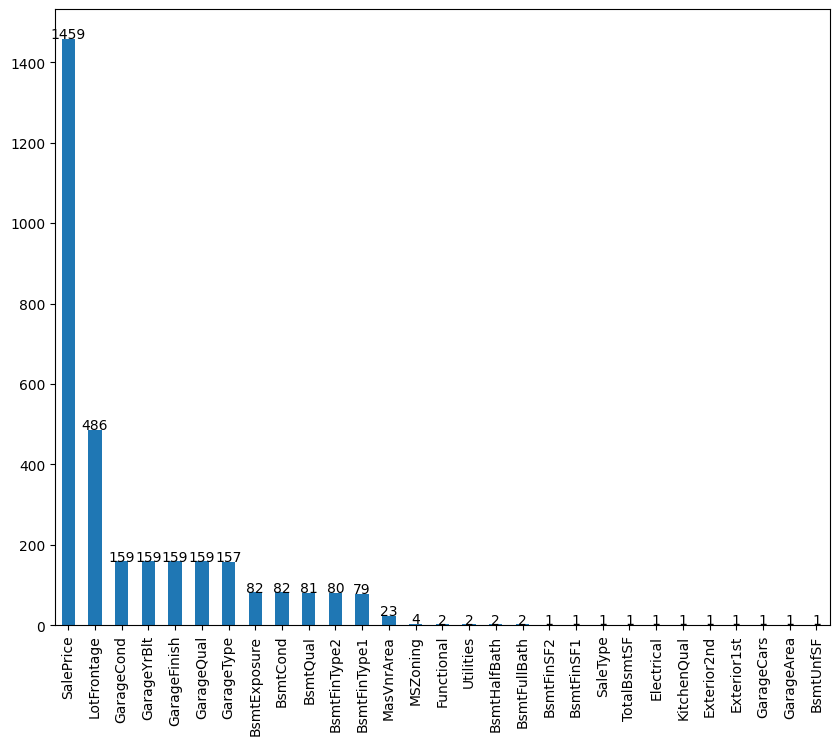

In [10]:
miss = combined_features.isna().sum().sort_values(ascending=False)
miss = miss[miss >0]
miss.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(10,8))
miss.plot.bar()

#Add data values at the end of each bar
for i, value in enumerate(miss):
    plt.text(i, value+1, str(value),ha='center')
    
plt.show()

 For certain features (like electrical systems or exterior material types), missing values might result from incomplete data entry. Filling these with the most common value (mode) reflects the most likely scenario.

 From the histogram, we can observe that the number of missing values for garage or basement-related features is roughly the same. Additionally, from the original data, we can see that missing values related to garages often occur together, and the same is true for basements. Therefore, the missing values for garage or basement-related features likely indicate that the property does not have these attributes, rather than the data being missing. Filling these missing values with 'None' clearly signifies that the absence of these attributes is a meaningful absence.

 After analysis, we can move on to fill in missing values.

## c. Missing value filling

In [11]:
# Replacing missing values with the most common value for specific columns for dataset
common_vars = ['Electrical', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
               'KitchenQual', 'Exterior1st', 'GarageCars', 'GarageArea', 'SaleType']
for var in common_vars:
    combined_features[var] = combined_features[var].fillna(test[var].mode()[0])
    
# Geographical Correlation: In real estate data, the lot frontage (LotFrontage) can vary significantly between different neighborhoods.
# Using the median value for each neighborhood ensures that the imputed value is representative of that specific area.
# Filling missing values in specified columns based on the most common value for each 'MSSubClass'
columns_to_fill = ['MSZoning', 'Utilities', 'BsmtHalfBath', 'BsmtFullBath', 'Functional']
combined_features[columns_to_fill] = combined_features.groupby('MSSubClass')[columns_to_fill].transform(lambda x: x.fillna(x.mode()[0]))


In [12]:
for col in [
   'GarageYrBlt', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
    'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','MasVnrArea'
]:
    
 combined_features[col] = combined_features[col].fillna('None')

Geographical Correlation: In real estate data, the lot frontage (LotFrontage) can vary significantly between different neighborhoods. Using the median value for each neighborhood ensures that the imputed value is representative of that specific area.

In [13]:
# Grouping by neighborhood and fillin in missing value by the median LotFrontage of all the neighborhood for train dataset
combined_features['LotFrontage'] = combined_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Remove the test set without the target variable
combined1 = pd.concat([combined_features, combined['dataset'].reset_index(drop=True)], axis=1)
data = combined1[combined1['dataset'] == 'train'].drop(columns=['dataset']).reset_index(drop=True)
test_data = combined1[combined1['dataset'] == 'test'].drop(columns=['dataset']).reset_index(drop=True)

# Verify that there are still missing values
missing_values_after_imputation = data.isnull().sum().sum()

print(f"Total missing values after imputation: {missing_values_after_imputation}")

Total missing values after imputation: 0


In [14]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49.0,Rec,1029.0,0.0,1078.0,GasA,Gd,Y,FuseA,1078,0,0,1078,1.0,0.0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1.0,240.0,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [15]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,NaN
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,NaN
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,NaN
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,NaN
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,None,None,None,0.0,0.0,None,None,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,NaN


## d. Feature Engineering

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


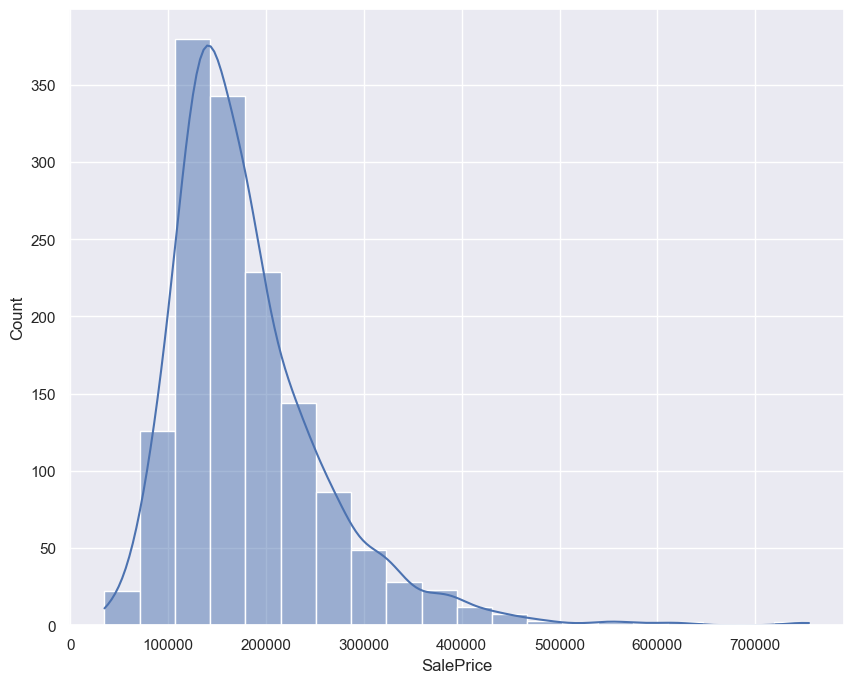

In [16]:
sns.set(rc={'figure.figsize':(10,8)}) #sets the default size of all seaborn plots to have a width of 10 inches and a height of 8 inches. 
sns.histplot(data['SalePrice'],bins=20,kde=True) #setting kde=False removes the kernel density estimate line

print("Skewness: ", data["SalePrice"].skew())
print("Kurtosis: ", data["SalePrice"].kurtosis())

Skewness and Kurtosis:

Skewness: The value is 1.8828757597682129, indicating that the distribution is positively skewed. This means that the right tail of the distribution is longer or fatter than the left. The majority of the data points are concentrated on the left side of the distribution.

Kurtosis: The value is 6.5362818600645305, indicating a leptokurtic distribution. This means the distribution has heavier tails and a sharper peak compared to a normal distribution.

Histogram Analysis:

The histogram shows the frequency of data points across different bins.

The peak of the histogram is around the 150,000-200,000 range, indicating this is where most data points are concentrated.

There are very few data points beyond 400,000, which aligns with the positive skewness indicated.

Kernel Density Estimate (KDE) Plot:

The KDE plot provides a smoothed estimate of the data distribution.

The peak observed in the KDE aligns with the peak in the histogram, reinforcing the concentration of data points around the 150,000-200,000 range.

The KDE also shows the long right tail of the distribution, which further confirms the positive skewness.


<Axes: xlabel='SalePrice'>

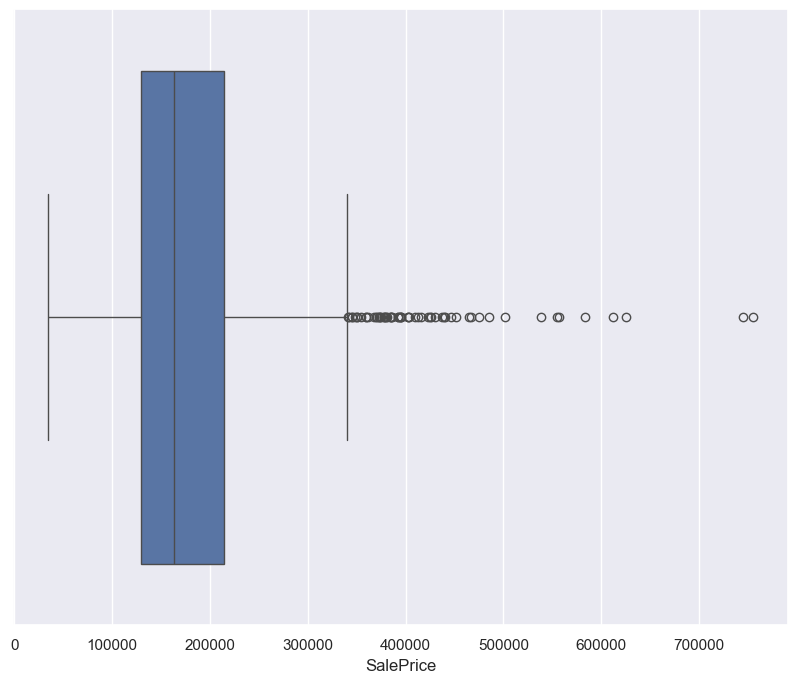

In [17]:
#boxplot with Seaborn to detect outlier
sns.boxplot(x=data['SalePrice'])

Box Plot Analysis:

Median:

The line in the middle of the box represents the median of the sale prices. It is approximately around 200,000.
Interquartile Range (IQR):

The edges of the box indicate the first quartile (Q1) and the third quartile (Q3), roughly between 100,000 and 250,000. This shows that 50% of the data points lie within this range.

Whiskers:

The whiskers extend to the minimum and maximum values of the data, excluding outliers. The upper whisker slightly exceeds 300,000, indicating that the maximum sale price, excluding outliers, is around this value.

Outliers:

The points beyond the whiskers are considered outliers. These points range from 300,000 to 700,000 and are quite numerous, indicating that there are several houses with significantly higher prices.


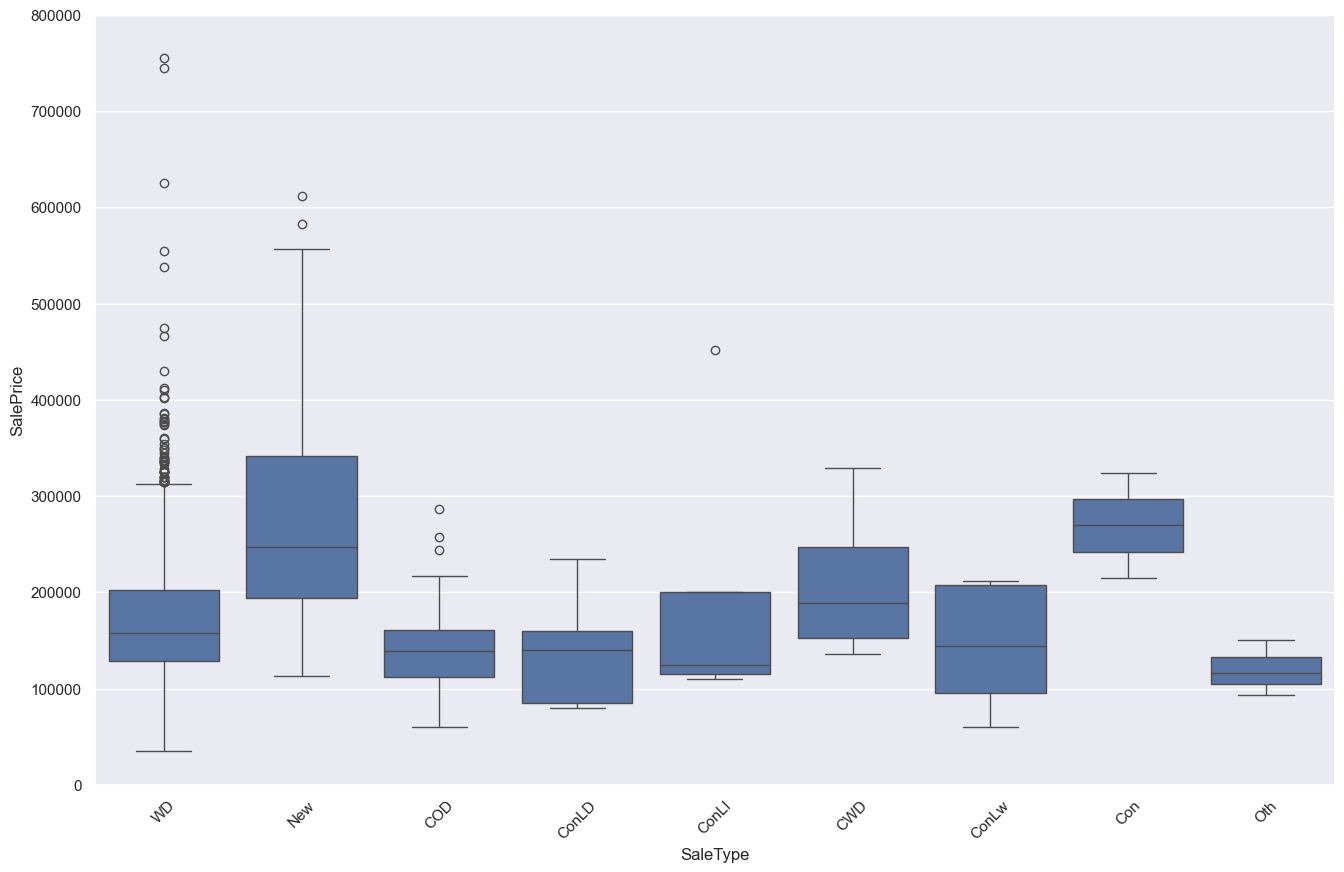

In [18]:
#boxplot with Seaborn to detect outlier
f, ax =plt.subplots(figsize=(16,10))
fig = sns.boxplot(x='SaleType',y='SalePrice',data=data)
fig.axis(ymin=0, ymax=800000)
xt =plt.xticks(rotation=45)

Analysis of SaleType and SalePrice Relationship:
Based on the provided definitions of sale types and the previous box plot analysis, the following conclusions can be drawn:

New:
New homes have the highest median SalePrice, indicating that newly constructed homes generally command higher prices. This could be due to better quality, modern amenities, and newer neighborhood developments.

WD:
Warranty Deed - Conventional is the most common sale type, with a median SalePrice around 200,000. This category shows a wide range of prices, including some high-value outliers, likely because it encompasses most traditional loan or cash purchases.

CWD:
Warranty Deed - Cash and VWD (Warranty Deed - VA Loan) also show relatively high median SalePrices. Cash transactions, in particular, might involve higher-value properties due to the ability of buyers to pay the full amount upfront.

COD:
Court Officer Deed/Estate sales typically involve special circumstances, resulting in a lower median SalePrice but still include some high-value outliers.

Con Series:
Categories like Con, ConLw, ConLI, and ConLD generally have lower median SalePrices. These sale types offer more flexible payment terms, attracting buyers with lower budgets.

Oth:
Other sales types have a moderate median SalePrice, representing a variety of other sale methods.

Conclusion:
Understanding the SaleType can provide insights into market trends and pricing strategies. For instance, new homes tend to be priced higher, reflecting their modern features and new construction. Traditional sales (WD) cover a wide price range, and cash sales (CWD) often include higher-priced properties due to the nature of the transaction.

Because in the real world, house prices exhibit high variability, a large number of outliers reflect real and important exceptional cases. These outliers may contain crucial market information, such as the economic conditions of specific areas, changes in housing demand, or unique property characteristics. Therefore, in order for the model to better predict house prices under real-world conditions and accurately reflect the actual situation, we choose not to process a large number of outliers.

#### Linear Relationship & Independence of Errors

In [19]:
# Analyze the relationship between SalesPrice and other numerical variables
numerical_columns = data.select_dtypes(include=['number'])
numerical_columns.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [20]:
# Select only categorical columns
categorical_columns = data.select_dtypes(include=['object'])
categorical_columns.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

## Bayesian target encoding(Converts category variable to  numerical variable)

One-hot encoding not only significantly increases the dimensionality of the dataset but also does not provide much information. Often, the 1s are scattered among many zeros, meaning that useful information is sparsely distributed across a large amount of data. This results in extremely sparse outcomes, making optimization difficult. Moreover, one-hot encoding transforms data into vector form, complicating subsequent correlation calculations. Worse still, there is a linear relationship between each sparse column of information. This means that one variable can be easily predicted using other variables, leading to issues of parallelism and multicollinearity in high dimensions. Label encoding interprets categories as ordered, which is often undesirable. Bayesian target encoding is a very effective method of representing categorical columns and occupies only one feature space. It is a mathematical method that uses the target as the encoding method. Bayesian target encoding attempts to incorporate other statistical measures of the target variable distribution, such as its variance or skewness (referred to as higher moments). Bayesian target encoding's smoothing parameters can help reduce overfitting. And this method handles overfit scenario better than target encoding

Bayesian target encoding: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html#sklearn.preprocessing.TargetEncoder

In [21]:
# Set target column
target_column = 'SalePrice'
data[target_column] = data[target_column].astype(float)

# Initialize Bayesian target encoder with specified parameters
target_encoder = TargetEncoder(target_type='continuous', smooth="auto")  #If "auto", then smooth is set to an empirical Bayes estimate.

# Converts a category column to a string type and handles missing values
for col in categorical_columns:
    data[col] = data[col].astype(str)

# Fit the encoder on the categorical columns and target column
for column in categorical_columns.columns:
    data[column] = target_encoder.fit_transform(
        data[column].values.reshape(-1, 1),
        data[target_column]
    )

# Convert the test set using the same encoder.
for column in categorical_columns:
    test_data[column] = target_encoder.transform(test_data[column].values.reshape(-1, 1),)


## Standardization and normalization

In [22]:
# Normalization and standardization of columns
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Select all numeric columns that need to be normalized and normalized, excluding the target variables
all_columns = data.columns.drop(target_column)

data[all_columns] = scaler_standard.fit_transform(data[all_columns])
data[all_columns] = scaler_minmax.fit_transform(data[all_columns])

# Save to CSV file
csv_path = './house-prices-advanced-regression-techniques/processed_train_data.csv'
data.to_csv(csv_path, index=True, index_label='index')

# The test set is converted using the same standardized/normalized tool.
test_data[all_columns] = scaler_standard.transform(test_data[all_columns])
test_data[all_columns] = scaler_minmax.transform(test_data[all_columns])

# Save to CSV file
csv_path2 = './house-prices-advanced-regression-techniques/processed_test_data.csv'
test_data.to_csv(csv_path2, index=True, index_label='index')

In [116]:
data


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.805522,0.150685,0.033420,0.989367,0.012008,0.405360,0.337314,0.111397,0.000000,0.422896,0.511645,0.357756,0.967785,0.873402,0.666667,0.500,0.949275,0.883333,0.386185,0.017862,0.674038,0.832467,0.202202,0.505421,0.370853,0.951246,0.431717,0.762899,0.394526,0.970618,0.125089,0.702300,0.000000,0.064212,0.140098,0.976872,0.980530,0.994387,1.000000,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.466616,0.500000,0.968422,0.000000,0.640918,0.469054,0.717968,0.50,0.386460,0.734593,0.977137,1.000000,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,0.312753,0.447320,208500.0
1,0.000000,0.805522,0.202055,0.038795,0.984672,0.000211,0.424026,0.416566,0.221026,0.064388,0.641631,0.098768,0.360060,1.000000,0.576259,0.555556,0.875,0.753623,0.433333,0.386185,0.017862,0.397193,0.340766,0.145691,0.217608,0.370853,0.377224,0.440180,0.762899,1.000000,0.451900,0.173281,0.702300,0.000000,0.121575,0.206547,0.976872,0.973925,0.981648,0.980533,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.154885,0.333333,0.980655,0.333333,0.657343,0.260648,0.708836,0.50,0.324401,0.734593,0.969633,0.957940,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,0.308190,0.468822,181500.0
2,0.235294,0.805522,0.160959,0.046507,1.000000,0.607283,0.442409,0.683997,0.063326,0.064388,0.433750,0.515262,0.357756,0.926902,0.834076,0.666667,0.500,0.934783,0.866667,0.371239,0.000000,0.674038,0.820148,0.573787,0.519606,0.369815,1.000000,0.431717,0.754655,0.574564,0.990297,0.086109,0.706816,0.000000,0.185788,0.150573,0.982302,1.000000,0.977440,1.000000,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.466616,0.333333,0.968422,0.333333,0.655860,0.501875,0.715313,0.50,0.428773,0.734593,0.977137,0.997568,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,0.311750,0.447320,223500.0
3,0.294118,0.816640,0.133562,0.038561,1.000000,0.571723,0.424026,0.000000,0.151003,0.064388,0.502804,0.514729,0.357756,0.967785,0.844629,0.666667,0.500,0.311594,0.333333,0.371239,0.023411,0.402294,0.467599,0.142517,0.220161,0.375044,0.253989,0.164035,0.900840,0.394470,0.450606,0.038271,0.702300,0.000000,0.231164,0.123732,0.977308,0.429029,0.990294,0.980533,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.467375,0.416667,0.980655,0.333333,0.224320,0.418676,0.284744,0.75,0.452750,0.734593,0.969633,0.963226,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,0.308190,0.323100,140000.0
4,0.235294,0.820291,0.215753,0.060576,0.941255,0.571723,0.426957,0.000000,0.249610,0.038887,0.999108,0.511645,0.360060,0.967785,0.873402,0.777778,0.500,0.927536,0.833333,0.371239,0.017862,0.678398,0.830493,0.621129,0.519271,0.370853,0.951246,0.440180,0.756719,0.629074,1.000000,0.116052,0.683694,0.000000,0.209760,0.187398,0.992790,0.973925,0.990294,1.000000,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.454097,0.583333,1.000000,0.333333,0.640918,0.404798,0.738071,0.75,0.589563,0.731331,0.984240,0.963226,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,0.307376,0.447320,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

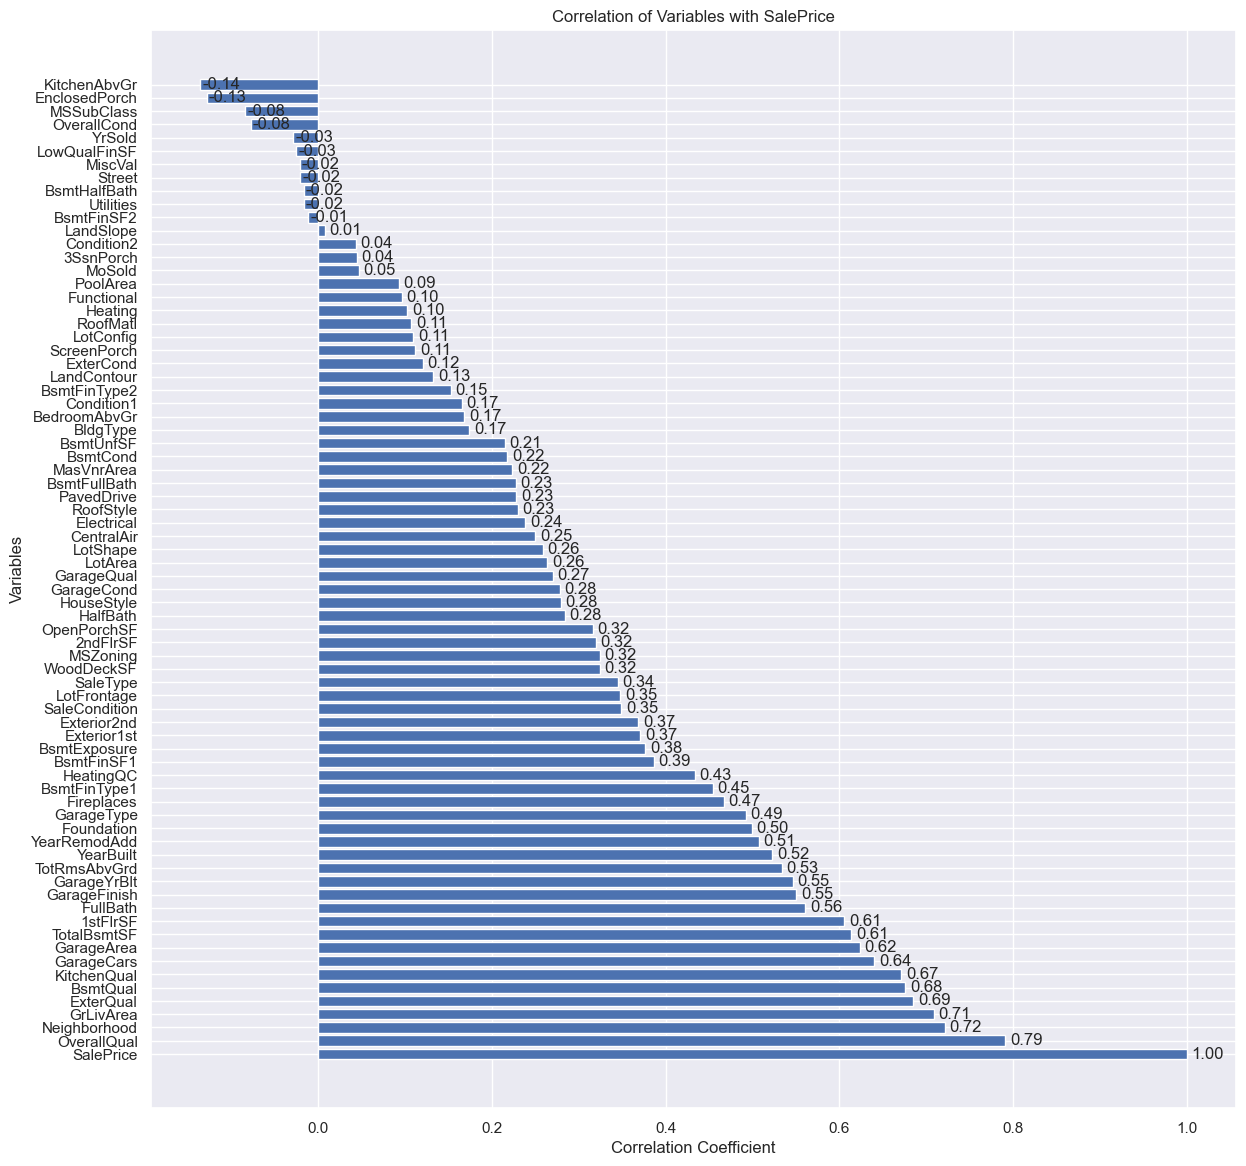

In [23]:
# Calculate correlation with SalePrice
correlation = data.corr()['SalePrice']
correlation = correlation.sort_values(ascending=False)

# Plotting the correlation as a horizontal bar chart
plt.figure(figsize=(14, 14))
bars = plt.barh(correlation.index, correlation.values)
plt.title('Correlation of Variables with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)

# Annotate each bar with the correlation coefficient value
for bar in bars:
    plt.annotate(format(bar.get_width(), '.2f'), 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='center', va='center',
                 xytext=(15, 0), 
                 textcoords='offset points')

plt.show()

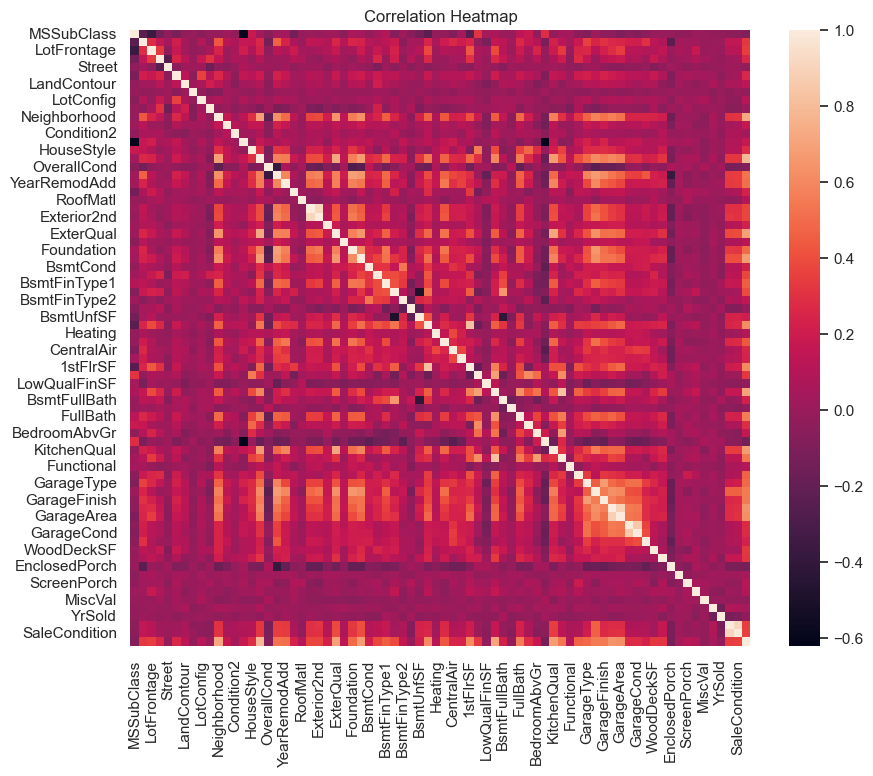

In [24]:
# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
print(data.corr())

               MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000 -0.228754    -0.370965 -0.139781 -0.037078   
MSZoning        -0.228754  1.000000     0.280048  0.147419  0.033183   
LotFrontage     -0.370965  0.280048     1.000000  0.334571 -0.033949   
LotArea         -0.139781  0.147419     0.334571  1.000000 -0.248452   
Street          -0.037078  0.033183    -0.033949 -0.248452  1.000000   
LotShape        -0.112661  0.212849     0.173455  0.245755 -0.052838   
LandContour     -0.022585  0.044158     0.027727  0.118857  0.012704   
Utilities       -0.009513 -0.023531    -0.021531  0.001856  0.016486   
LotConfig       -0.054648  0.092302    -0.012520  0.173487  0.018576   
LandSlope       -0.007765 -0.029823     0.052061  0.299609 -0.163495   
Neighborhood    -0.012480  0.427788     0.245098  0.148986 -0.035310   
Condition1       0.013981  0.114576     0.009919  0.010466 -0.062859   
Condition2      -0.025846  0.066798     0.054063  0.057008 -0.01

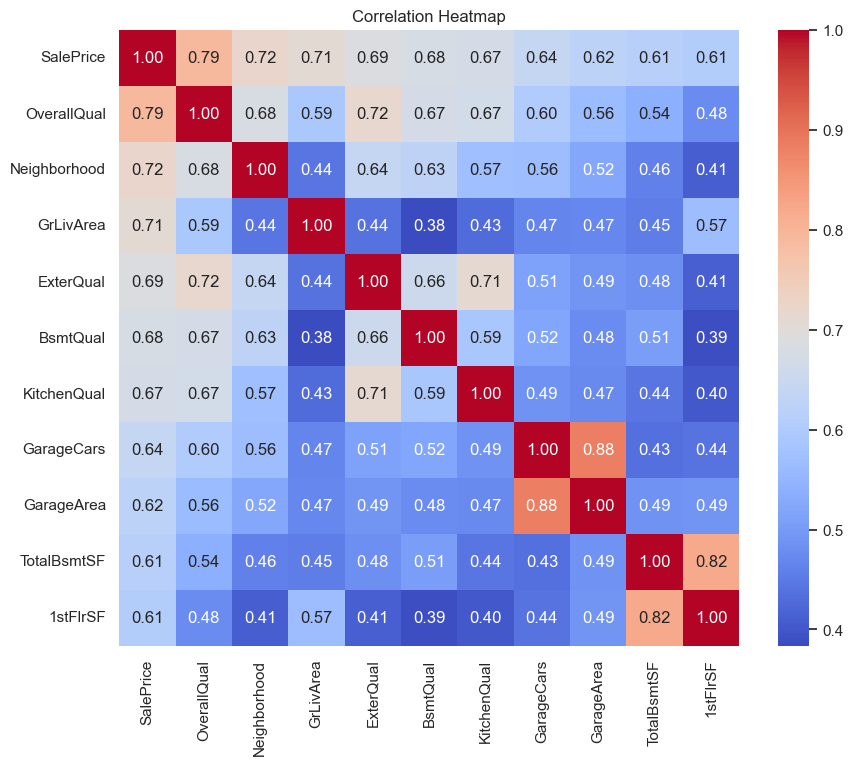

In [26]:
# Get the top 10 highest correlation values with 'SalesPrice'
top_correlation_with_salesprice = data.corr()['SalePrice'].nlargest(11)

# Filter numerical_columns to include only top correlations
top_correlation_matrix = data.corr().loc[top_correlation_with_salesprice.index, top_correlation_with_salesprice.index]

# Create correlation heatmap with top 10 variables with SalePrice
plt.figure(figsize=(10, 8))
sns.heatmap(top_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

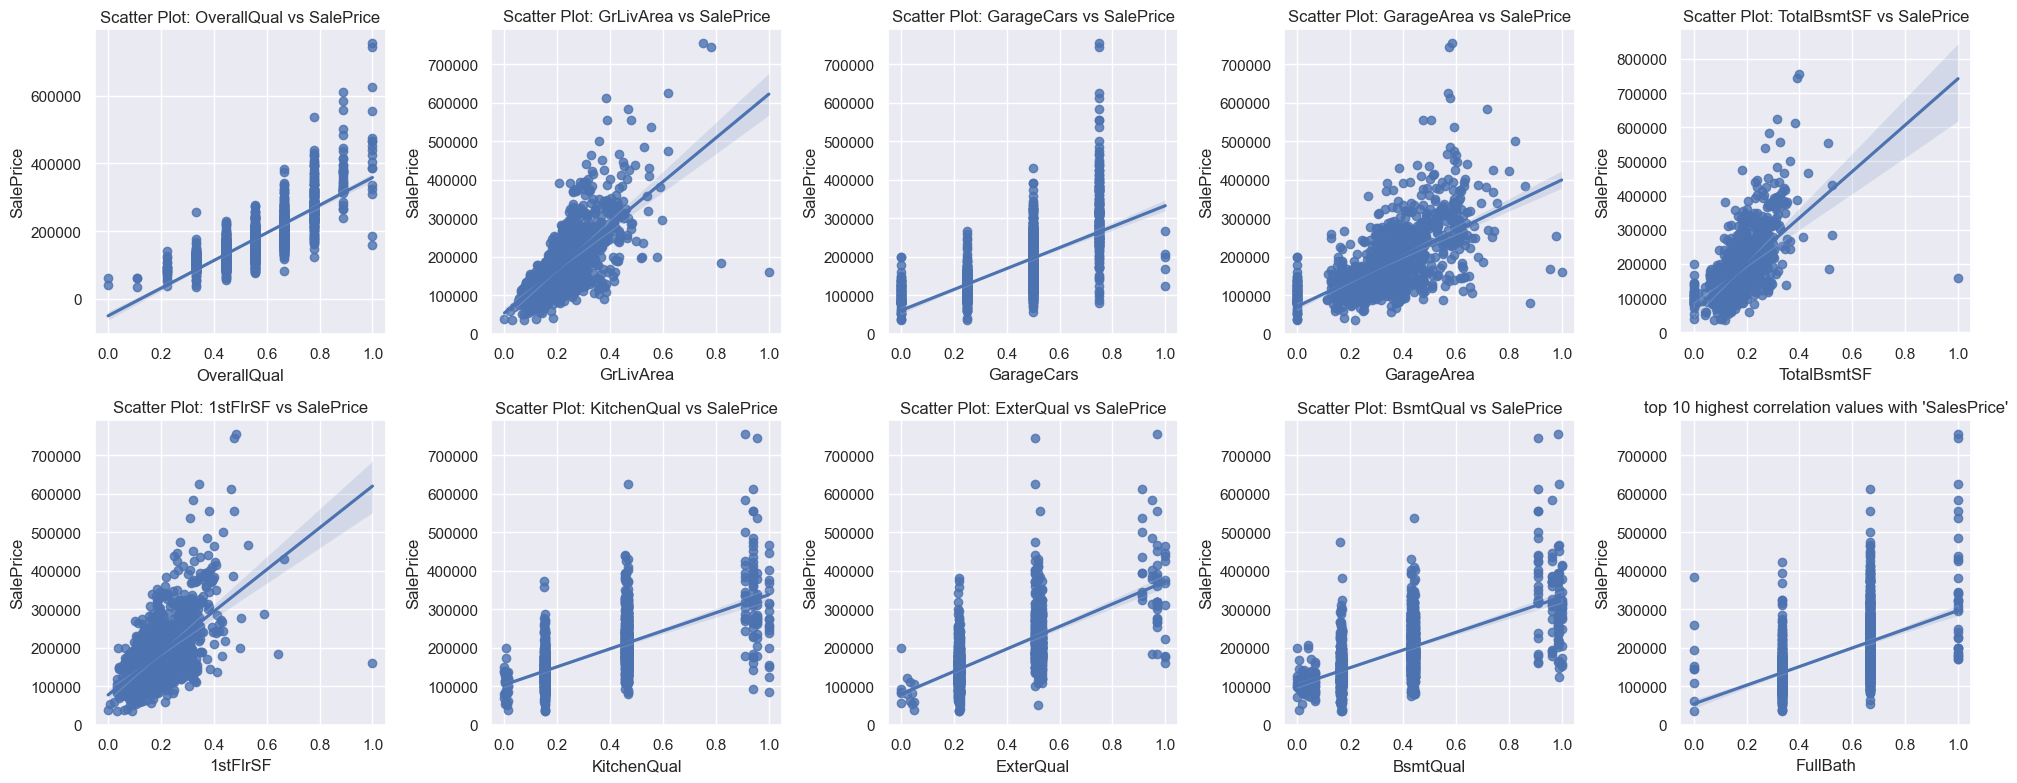

In [115]:
# List of Selected variables for scatter plots
variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
             '1stFlrSF','KitchenQual', 'ExterQual', 'BsmtQual','FullBath']

# Create scatter plots for each variable arranged in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, var in enumerate(variables):
    sns.regplot(data=data, x=var, y='SalePrice', ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(f'Scatter Plot: {var} vs SalePrice')
    axes[i//5, i%5].set_xlabel(var)
    axes[i//5, i%5].set_ylabel('SalePrice')

# Hide empty subplots if any
for i in range(len(variables), 2*5):
    fig.delaxes(axes.flatten()[i])

plt.title("top 10 highest correlation values with 'SalesPrice'")
plt.tight_layout()
plt.show()

The scatter plot shows the relationship between each feature and the housing price, showing a positive correlation on the whole, that is, the higher the value of these features, the higher the housing price. The most significant positive correlation features include OverallQual, GrLivArea, GarageArea, TotalBsmtSF, etc.

From the previous cross-correlation analysis, it is evident that some variables have strong correlations with each other and also with SalePrice.

GarageArea is multicollinear with GarageCars.

TotalBsmtSF is multicollinear with 1stFlrSF.

TotRmsAbvGrd is multicollinear with GrLivArea.

GrLivArea is multicollinear with FullBath.

The correlation between two variables is considered be to weak if the absolte value of correlation is bettwen 0.25 and 0.45.

Here are the list of variables having weak correlation with SalePrice: BsmtFinSF1, LotFrontage, WoodDeckSF, 2ndFlrSF, OpenPorchSF, HalfBath, LotArea, BsmtFullBath, BsmtUnfSF, BedroomAbvGr, ScreenPorch, PoolArea, MoSold, 3SsnPorch, BsmtFinSF2, BsmtHalfBath, MiscVal, Id, LowQualFinSF, YrSold, OverallCond, MSSubClass, EnclosedPorch, KitchenAbvGr

When analyzing the linear relationship and independence of errors, we observe that some variables do not exhibit a strong linear relationship with the target variable. Additionally, we find that some independent variables are highly correlated with each other, which negatively impacts the accuracy of our linear regression analysis. To address these issues, we will perform dimensionality reduction.

Given that our target variable (SalePrice) is a continuous numerical vector, Linear Discriminant Analysis (LDA) is not appropriate for this scenario. Furthermore, not all of our data follow a normal distribution, and the correlation between many independent and dependent variables is not strong enough to justify using factor analysis for dimensionality reduction.

Instead, we will employ Principal Component Analysis (PCA). Through PCA, the original features are transformed into a set of uncorrelated new features. These new features are linear combinations of the original features, which can reduce dimensionality and eliminate multicollinearity. The new features will have high explanatory power for the target variable.

By applying PCA, we can extract the most useful independent variables and reduce intercorrelation among them, thereby enhancing the accuracy and reliability of our linear regression model.


## Feature Selection
Remove features that have a low correlation with the target variable. This reduces the data dimension, which improves the training speed and interpretability of the model.



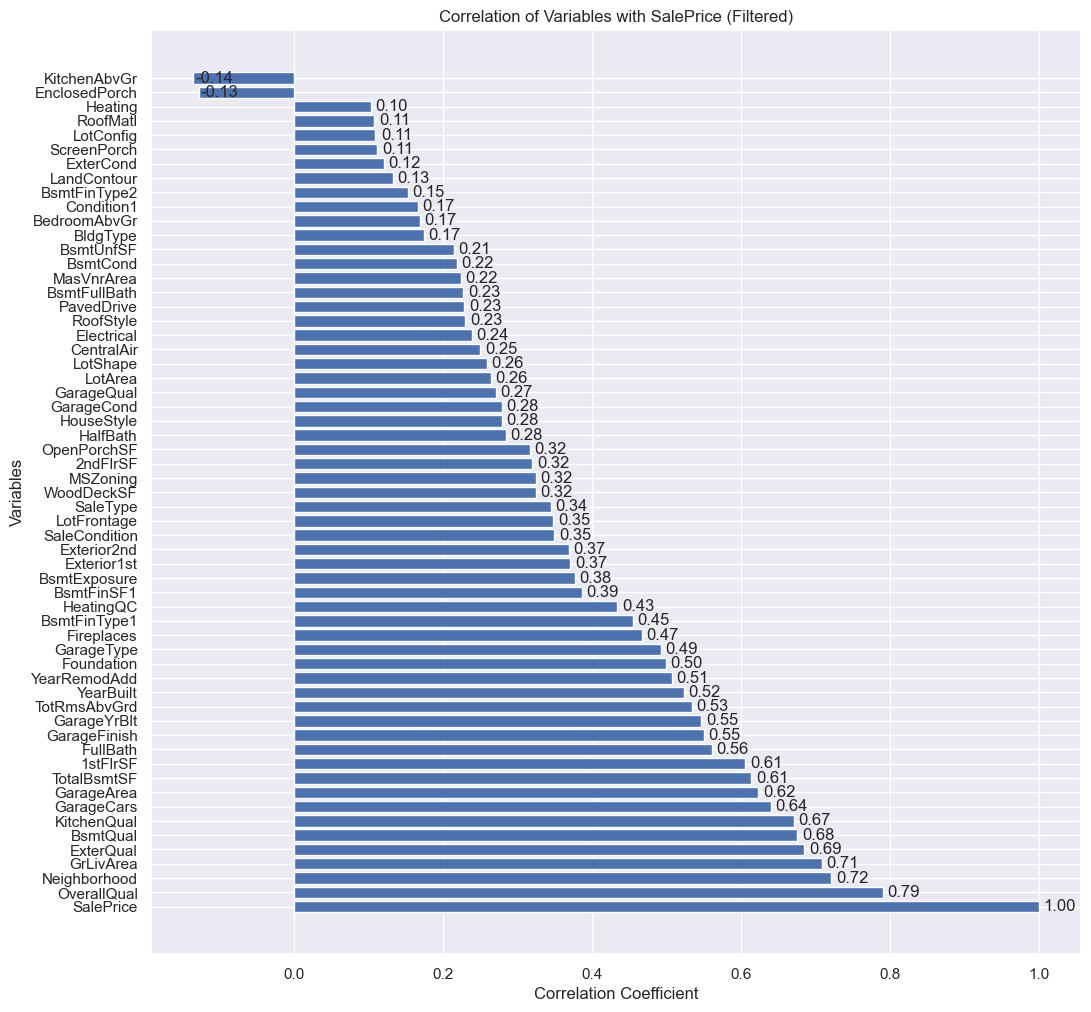

In [28]:
# Screen for features with correlation less than 0.1
low_correlation_features = correlation[correlation.abs() < 0.1].index
data_filtered = data.drop(columns=low_correlation_features)

# The filtered correlation was recalculated
correlation_filtered = data_filtered.corr()['SalePrice'].sort_values(ascending=False)

# Draw a correlation horizontal bar chart
plt.figure(figsize=(12, 12))
bars = plt.barh(correlation_filtered.index, correlation_filtered.values)
plt.title('Correlation of Variables with SalePrice (Filtered)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)

# Add a phase relationship value for each bar chart
for bar in bars:
    plt.annotate(format(bar.get_width(), '.2f'), 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='center', va='center',
                 xytext=(15, 0), 
                 textcoords='offset points')

plt.show()

In [29]:
data_filtered.shape

(1460, 59)

## PCA

Eigenvalues: [0.63254325 0.14231265 0.11841309 0.0909236  0.08075397 0.07693071
 0.0661821  0.06019112 0.05461431 0.05172307 0.04969535 0.04347515
 0.04006617 0.03672195 0.03538256 0.03326437 0.03240796 0.02828522
 0.02729358 0.02664563 0.02456109 0.02367334 0.02239215 0.02122245
 0.01951867 0.018875   0.01764904]


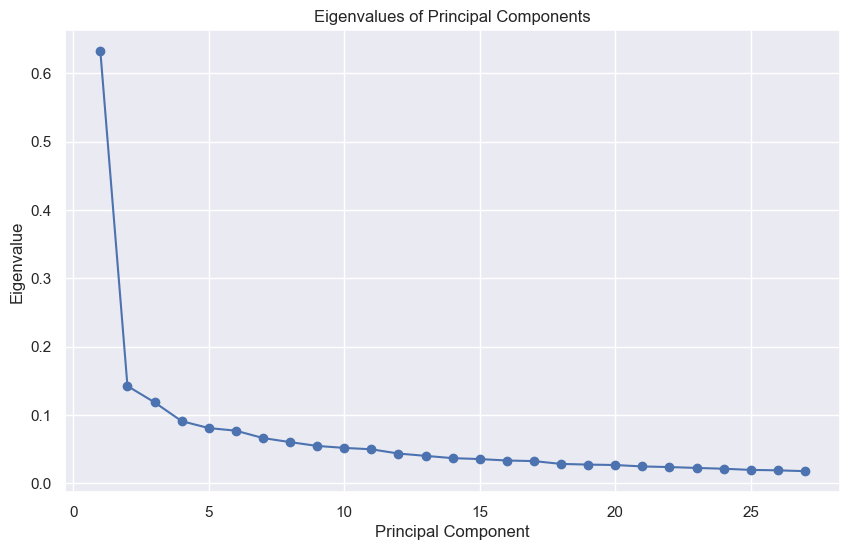

In [30]:
pca = PCA(n_components=0.90)  # Retention of 95% variance

X = data_filtered.drop(columns=['SalePrice'])
y = data_filtered['SalePrice']

principal_components = pca.fit_transform(X)

# Drop the target column from test data
test_data_features = test_data.drop(columns=['SalePrice'])
test_data_features = test_data_features[X.columns]  # Reorder columns to match training data
principal_components_test = pca.transform(test_data_features)

# Displays the size of each feature value
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)

# Draw a graph of eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, 'o-')
plt.title('Eigenvalues of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


In [31]:
X

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition
0,0.805522,0.150685,0.033420,0.012008,0.405360,0.111397,0.422896,0.511645,0.967785,0.873402,0.666667,0.949275,0.883333,0.386185,0.017862,0.674038,0.832467,0.202202,0.505421,0.370853,0.951246,0.431717,0.762899,0.394526,0.970618,0.125089,0.702300,0.064212,0.140098,0.976872,0.980530,0.994387,1.000000,0.119780,0.413559,0.259231,0.333333,0.666667,0.5,0.375,0.333333,0.466616,0.500000,0.000000,0.640918,0.469054,0.717968,0.50,0.386460,0.734593,0.977137,1.000000,0.000000,0.111517,0.000000,0.0,0.312753,0.447320
1,0.805522,0.202055,0.038795,0.000211,0.424026,0.221026,0.641631,0.098768,1.000000,0.576259,0.555556,0.753623,0.433333,0.386185,0.017862,0.397193,0.340766,0.145691,0.217608,0.370853,0.377224,0.440180,0.762899,1.000000,0.451900,0.173281,0.702300,0.121575,0.206547,0.976872,0.973925,0.981648,0.980533,0.212942,0.000000,0.174830,0.000000,0.666667,0.0,0.375,0.333333,0.154885,0.333333,0.333333,0.657343,0.260648,0.708836,0.50,0.324401,0.734593,0.969633,0.957940,0.347725,0.000000,0.000000,0.0,0.308190,0.468822
2,0.805522,0.160959,0.046507,0.607283,0.442409,0.063326,0.433750,0.515262,0.926902,0.834076,0.666667,0.934783,0.866667,0.371239,0.000000,0.674038,0.820148,0.573787,0.519606,0.369815,1.000000,0.431717,0.754655,0.574564,0.990297,0.086109,0.706816,0.185788,0.150573,0.982302,1.000000,0.977440,1.000000,0.134465,0.419370,0.273549,0.333333,0.666667,0.5,0.375,0.333333,0.466616,0.333333,0.333333,0.655860,0.501875,0.715313,0.50,0.428773,0.734593,0.977137,0.997568,0.000000,0.076782,0.000000,0.0,0.311750,0.447320
3,0.816640,0.133562,0.038561,0.571723,0.424026,0.151003,0.502804,0.514729,0.967785,0.844629,0.666667,0.311594,0.333333,0.371239,0.023411,0.402294,0.467599,0.142517,0.220161,0.375044,0.253989,0.164035,0.900840,0.394470,0.450606,0.038271,0.702300,0.231164,0.123732,0.977308,0.429029,0.990294,0.980533,0.143873,0.366102,0.260550,0.333333,0.333333,0.0,0.375,0.333333,0.467375,0.416667,0.333333,0.224320,0.418676,0.284744,0.75,0.452750,0.734593,0.969633,0.963226,0.000000,0.063985,0.492754,0.0,0.308190,0.323100
4,0.820291,0.215753,0.060576,0.571723,0.426957,0.249610,0.999108,0.511645,0.967785,0.873402,0.777778,0.927536,0.833333,0.371239,0.017862,0.678398,0.830493,0.621129,0.519271,0.370853,0.951246,0.440180,0.756719,0.629074,1.000000,0.116052,0.683694,0.209760,0.187398,0.992790,0.973925,0.990294,1.000000,0.186095,0.509927,0.351168,0.333333,0.666667,0.5,0.500,0.333333,0.454097,0.583333,0.333333,0.640918,0.404798,0.738071,0.75,0.589563,0.731331,0.984240,0.963226,0.224037,0.153565,0.000000,0.0,0.307376,0.447320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.796795,0.140411,0.030929,0.021619,0.426957,0.111397,0.406466,0.515262,0.967785,0.873402,0.555556,0.920290,0.833333,0.386185,0.025607,0.673737,0.809791,0.145691,0.219332,0.370712,0.959722,0.440180,0.765917,0.398766,0.504863,0.000000,0.705947,0.407962,0.155974,0.976872,0.992436,0.994387,0.986877,0.142038,0.336077,0.247362,0.000000,0.666667,0.5,0.375,0.333333,0.154225,0.416667,0.333333,0.657343,0.354341,0.717968,0.50,0.324401,0.742982,0.984240,0.997568,0.000000,0.073126,0.000000,0.0,0.312753,0.468280
1456,0.796795,0.219178,0.055505,0.021619,0.442409,0.063326,0.397926,0.494895,0.9

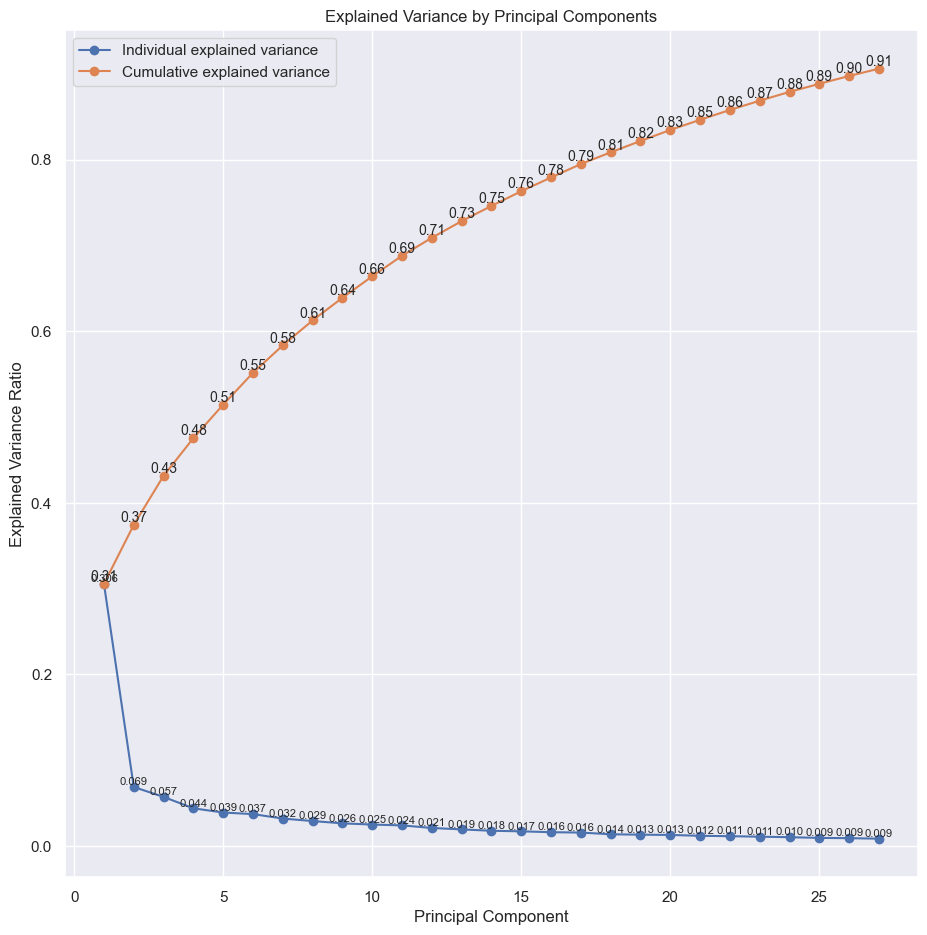

In [32]:
# Variance of presentation
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Draw
plt.figure(figsize=(11, 11))
x = np.arange(1, len(explained_variance_ratio) + 1)
plt.plot(x, explained_variance_ratio, 'o-', label='Individual explained variance')
plt.plot(x, cumulative_variance, 'o-', label='Cumulative explained variance')

# Display values at each point
for i, (var_ratio, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance)):
    plt.text(i + 1, var_ratio, f'{var_ratio:.3f}', ha='center', va='bottom', fontsize=8)
    plt.text(i + 1, cum_var, f'{cum_var:.2f}', ha='center', va='bottom', fontsize=10)

# Set chart titles and labels
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

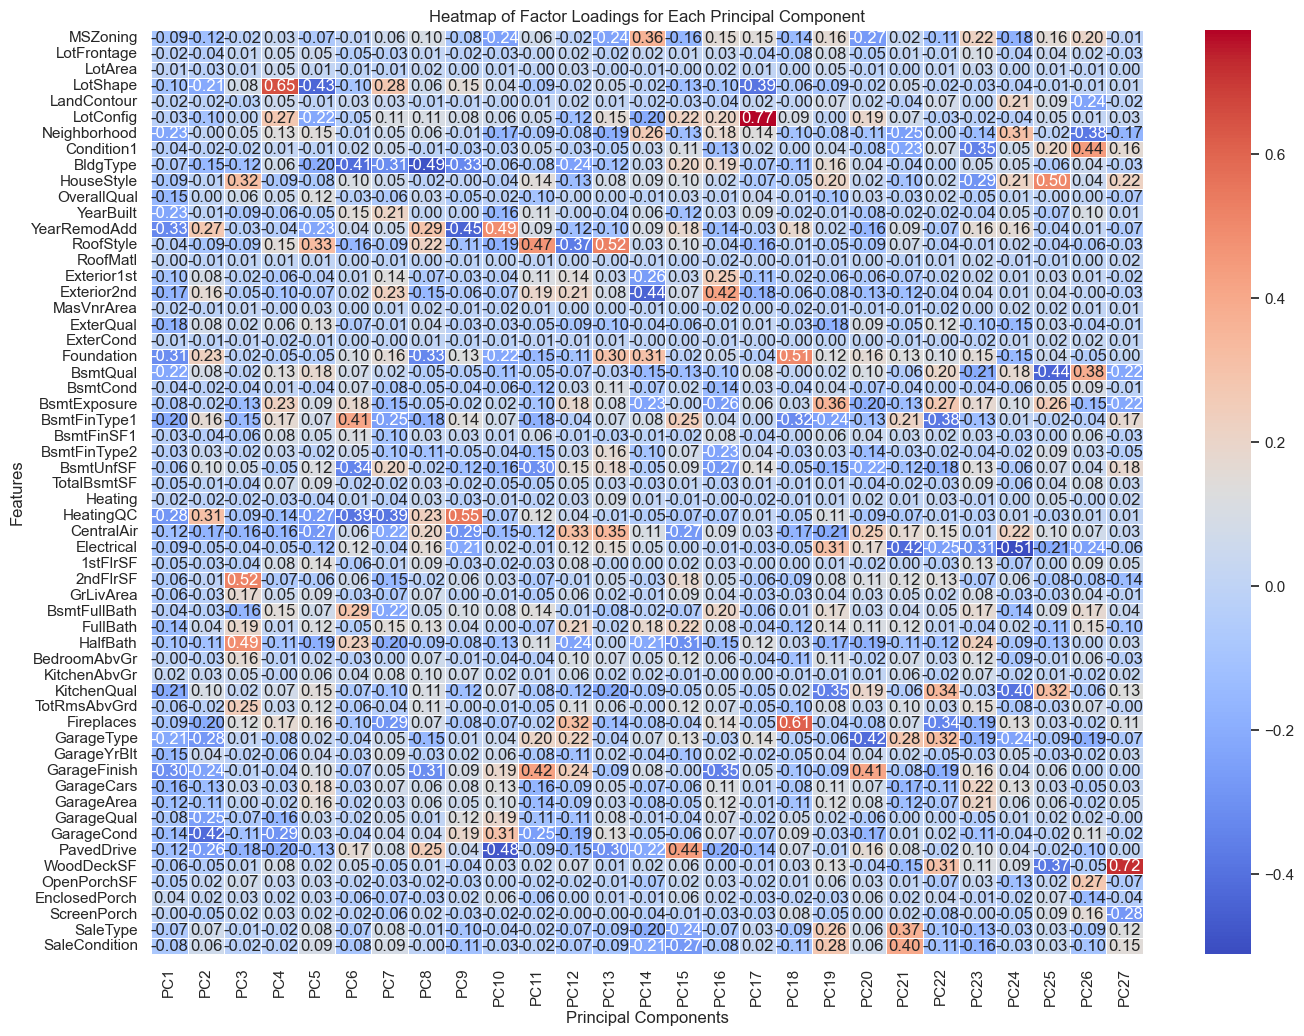

In [33]:
# factor loading
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(eigenvalues))], index=X.columns)

# Generating heat map
plt.figure(figsize=(16, 12))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Factor Loadings for Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


In [34]:
print(loadings)

                    PC1       PC2       PC3       PC4       PC5       PC6  \
MSZoning      -0.090821 -0.116205 -0.022851  0.028954 -0.066549 -0.005033   
LotFrontage   -0.023517 -0.042901  0.014987  0.046498  0.048886 -0.045808   
LotArea       -0.006595 -0.027577  0.007143  0.046798  0.012075 -0.009499   
LotShape      -0.104976 -0.213676  0.079780  0.646995 -0.431798 -0.099523   
LandContour   -0.021240 -0.018413 -0.030336  0.048204 -0.007890  0.026512   
LotConfig     -0.025439 -0.102200  0.001471  0.273455 -0.217750 -0.049456   
Neighborhood  -0.227121 -0.000112  0.048877  0.134120  0.145416 -0.009630   
Condition1    -0.037364 -0.021147 -0.017051  0.011901 -0.011021  0.019566   
BldgType      -0.066950 -0.145068 -0.124838  0.063830 -0.199681 -0.413699   
HouseStyle    -0.090820 -0.013194  0.316683 -0.087088 -0.076687  0.102394   
OverallQual   -0.153267  0.001844  0.063872  0.048348  0.124745 -0.030855   
YearBuilt     -0.226501 -0.011814 -0.089352 -0.057821 -0.048665  0.146651   

## Interpretation of Key Components
Based on the provided factor analysis results, we can interpret and analyze the 22 factors. Each factor's interpretation will be based on its significant loadings. 

PC1:
High-weight variables: YearRemodAdd, YearBuilt, Foundation, OverallQual
Interpretation: PC1 primarily captures the overall quality and structural factors of the house, including the year of remodeling, year built, foundation type, and overall quality.

PC2:
High-weight variables: 2ndFlrSF, HouseStyle, GrLivArea
Interpretation: PC2 mainly reflects the living area and style of the house, particularly the second-floor area and total living area.

PC3:
High-weight variables: Fireplaces, GarageCars, GarageArea
Interpretation: PC3 primarily captures the features related to the garage and fireplaces, emphasizing the importance of these additional amenities in the house.

PC4:
High-weight variables: BsmtUnfSF, BsmtFinType1, BsmtFullBath
Interpretation: PC4 focuses on basement-related features, including unfinished basement area, basement finish type, and the number of full bathrooms in the basement.

PC5:
High-weight variables: YearRemodAdd, BsmtFinType1, HouseStyle
Interpretation: PC5 mainly reflects the relationship between the year of remodeling, basement finish type, and house style.

PC6:
High-weight variables: YearRemodAdd, BsmtFinType1, Foundation
Interpretation: PC6 captures the association between the year of remodeling and basement-related features.

PC7:
High-weight variables: Fireplaces, HeatingQC, CentralAir
Interpretation: PC7 mainly reflects the heating quality, central air conditioning, and fireplace features of the house.

PC8:
High-weight variables: HouseStyle, 2ndFlrSF, HalfBath
Interpretation: PC8 captures the relationship between house style, second-floor area, and the number of half bathrooms.

PC9:
High-weight variables: HeatingQC, GrLivArea, GarageCars
Interpretation: PC9 mainly reflects the heating quality, living area, and the number of garage car spaces.

PC10:
High-weight variables: Foundation, YearBuilt, BsmtUnfSF
Interpretation: PC10 captures the relationship between foundation type, year built, and unfinished basement area.

PC11:
High-weight variables: GarageFinish, GarageQual, GarageCond
Interpretation: PC11 mainly reflects the garage's finish status, quality, and condition.

PC12:
High-weight variables: YearRemodAdd, GarageFinish, BsmtFullBath
Interpretation: PC12 captures the relationship between the year of remodeling, garage finish status, and the number of full bathrooms in the basement.

PC13:
High-weight variables: BsmtExposure, CentralAir, KitchenAbvGr
Interpretation: PC13 mainly reflects basement exposure, central air conditioning, and the number of kitchens.

PC14:
High-weight variables: HouseStyle, FullBath, TotRmsAbvGrd
Interpretation: PC14 captures the relationship between house style, the number of full bathrooms, and the total number of rooms above ground.

PC15:
High-weight variables: HouseStyle, BsmtFullBath, KitchenQual
Interpretation: PC15 mainly reflects house style, the number of full bathrooms in the basement, and kitchen quality.

PC16:
High-weight variables: KitchenQual, GarageCond, EnclosedPorch
Interpretation: PC16 captures kitchen quality, garage condition, and enclosed porch features.

PC17:
High-weight variables: RoofStyle, SaleType, SaleCondition
Interpretation: PC17 mainly reflects the roof style, sale type, and sale condition of the house.

PC18:
High-weight variables: ScreenPorch, KitchenQual, GarageCond
Interpretation: PC18 captures screen porch, kitchen quality, and garage condition features.

PC19:
High-weight variables: MSZoning, Foundation, GarageCars
Interpretation: PC19 mainly reflects zoning, foundation type, and the number of garage car spaces.


PC20:
High-weight variables: HeatingQC, EnclosedPorch, GarageCond
Interpretation: PC20 captures heating quality, enclosed porch, and garage condition.

PC21:
High-weight variables: Electrical, ScreenPorch, SaleType
Interpretation: PC21 mainly reflects electrical system, screen porch, and sale type.

PC22:
High-weight variables: RoofStyle, BsmtFullBath, GarageCond
Interpretation: PC22 captures roof style, the number of full bathrooms in the basement, and garage condition.

PC23:
High-weight variables: GarageType, HeatingQC, SaleCondition
Interpretation: PC23 mainly reflects garage type, heating quality, and sale condition.

PC24:
High-weight variables: MSZoning, Neighborhood, ScreenPorch
Interpretation: PC24 captures zoning, neighborhood characteristics, and screen porch features.

PC25:
High-weight variables: SaleType, SaleCondition, OpenPorchSF
Interpretation: PC25 mainly reflects sale type, sale condition, and open porch area.

PC26:
High-weight variables: ScreenPorch, GarageCond, HeatingQC
Interpretation: PC26 captures screen porch, garage condition, and heating quality.

PC27:
High-weight variables: SaleCondition, KitchenAbvGr, GarageCond
Interpretation: PC27 mainly reflects sale condition, the number of kitchens, and garage condition.

## General Observations
The principal component analysis (PCA) reveals that each principal component captures different aspects of the house characteristics. These aspects include the overall quality of the house, living area, garage features, basement features, remodeling year, and sale conditions. Each principal component represents a unique combination of features, providing a comprehensive understanding of the multidimensional characteristics of the house data, which is useful for further data analysis and modeling.

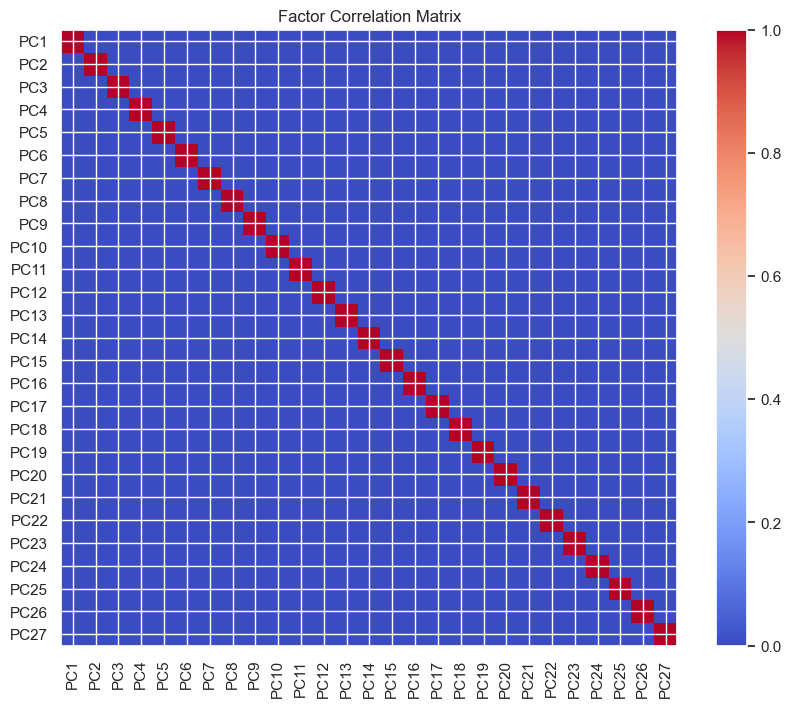

In [35]:
# Calculate the correlation matrix between the factors
factor_correlation_matrix = np.corrcoef(principal_components.T)

# Visualization factor correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(factor_correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Factor Correlation Matrix')
plt.xticks(np.arange(len(loadings.columns)), loadings.columns, rotation=90)
plt.yticks(np.arange(len(loadings.columns)), loadings.columns)
plt.show()


The principal components treated with PCA are orthogonal to each other, which means that they are linearly independent. Therefore, the correlation matrix between the factors should be a diagonal matrix, with 1 on the diagonal and values close to 0 on the rest of the positions.

## Kurtosis and skewness calculation

The factors we get, kurtosis and skewness are all between -2 and 2, so they are acceptable, and we can accept them as normal distributions.https://www.mediecogroup.com/group/posts/gp_S9OF9kcg/

However, our target variable is not the data of normal distribution, the skewness is 1.880940746034036, and the kurtosis is 6.509812011089439. Next, we evaluate the results with and without the conversion of the target variable.


Skewness of PCA components:
 PC1    -0.089001
PC2     0.764868
PC3     0.442675
PC4     0.589095
PC5     0.247008
PC6     0.464166
PC7     0.173412
PC8     0.332605
PC9     0.223676
PC10    0.322575
PC11    0.230565
PC12   -0.111602
PC13    0.241172
PC14   -0.214348
PC15   -0.159066
PC16    0.244973
PC17    0.778604
PC18    0.403369
PC19   -0.043088
PC20    0.122804
PC21    0.522144
PC22    0.190546
PC23    0.146101
PC24    0.098567
PC25   -0.283472
PC26    0.055686
PC27    0.393183
dtype: float64
Kurtosis of PCA components:
 PC1    -0.965618
PC2     1.215941
PC3    -0.641180
PC4    -0.094555
PC5     0.293905
PC6     0.986702
PC7     0.502468
PC8     1.102342
PC9     0.687509
PC10    2.786224
PC11    0.333976
PC12    0.548291
PC13    1.233189
PC14    0.224308
PC15    1.199303
PC16    0.274605
PC17    1.632489
PC18    0.551787
PC19    0.304043
PC20    0.481357
PC21    0.587730
PC22    0.407044
PC23    0.519236
PC24    0.867940
PC25    0.692455
PC26    0.721162
PC27    1.007760
dtype: fl

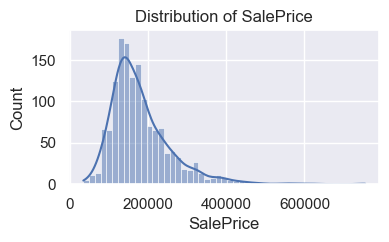


Skewness of log-transformed SalePrice: 0.1212103673013655
Kurtosis of log-transformed SalePrice: 0.8026555069117713


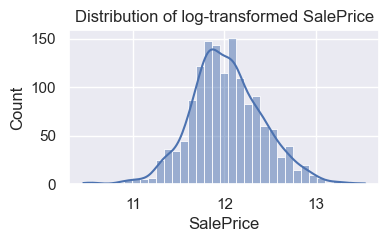

In [39]:
X_new = principal_components
data_pca = pd.DataFrame(X_new, columns=[f'PC{i+1}' for i in range(X_new.shape[1])])

# Calculate skewness and kurtosis
skewness = data_pca.apply(skew)
kurt = data_pca.apply(kurtosis)

print("Skewness of PCA components:\n", skewness)
print("Kurtosis of PCA components:\n", kurt)

# Calculate skewness and kurtosis for the target variable
y_skewness = skew(y)
y_kurtosis = kurtosis(y)

print("\nSkewness of SalePrice:", y_skewness)
print("Kurtosis of SalePrice:", y_kurtosis)

# Distribution mapping
def plot_distribution(data, title):
    plt.figure(figsize=(4, 2))
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.show()

# Plot the distribution of target variables
plot_distribution(y, 'Distribution of SalePrice')

# Logarithmic conversion of the target variable
y_log = np.log(y)

# Calculate skewness and kurtosis after conversion of target variables
y_log_skewness = skew(y_log)
y_log_kurtosis = kurtosis(y_log)

print("\nSkewness of log-transformed SalePrice:", y_log_skewness)
print("Kurtosis of log-transformed SalePrice:", y_log_kurtosis)
plot_distribution(y_log, 'Distribution of log-transformed SalePrice')

## Split data set

In [92]:
X_new = principal_components
data_pca = pd.DataFrame(X_new, columns=[f'PC{i+1}' for i in range(X_new.shape[1])])

X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(data_pca, y_log, test_size=0.2, random_state=42)


In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1168, 27)
(1168,)
(292, 27)
(292,)


# Regression model

In [107]:
# Define a function to perform Linear Regression without regularization
# When the degree is 1, the model is a linear multiple regression model
# When the degree is greater than or equal to 2, the model is a polynomial multiple regression model
def linear_regression(X_train, y_train, X_test, y_test, degree, filename):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"\nLinear Regression (degree {degree}) without regularization")
    print("Training set R^2:", r2_score(y_train, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

    # Save the model
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")

# Linear Regression without regularization (degree 1)
linear_regression(X_train, y_train, X_test, y_test, degree=1, filename='./model/linear_model_degree1.pkl')

# Polynomial Linear Regression without regularization (degree 2)
linear_regression(X_train, y_train, X_test, y_test, degree=2, filename='./model/linear_model_degree2.pkl')

# Polynomial Linear Regression without regularization (degree 3)
linear_regression(X_train, y_train, X_test, y_test, degree=3, filename='./model/linear_model_degree3.pkl')

# Polynomial Linear Regression without regularization (degree 4)
linear_regression(X_train, y_train, X_test, y_test, degree=4, filename='./model/linear_model_degree4.pkl')

# Polynomial Linear Regression without regularization (degree 5)
linear_regression(X_train, y_train, X_test, y_test, degree=5, filename='./model/linear_model_degree5.pkl')


Linear Regression (degree 1) without regularization
Training set R^2: 0.8223812058664878
Training set RMSE: 32548.67502684892
Test set R^2: 0.8315358303099882
Test set RMSE: 35946.83763205486
Model saved to ./model/linear_model_degree1.pkl

Linear Regression (degree 2) without regularization
Training set R^2: 0.9386543722433184
Training set RMSE: 19128.488893098045
Test set R^2: 0.8417707402778518
Test set RMSE: 34837.76740249885
Model saved to ./model/linear_model_degree2.pkl

Linear Regression (degree 3) without regularization
Training set R^2: 1.0
Training set RMSE: 5.757842154108457e-10
Test set R^2: 0.6897895725800642
Test set RMSE: 48779.24939133292
Model saved to ./model/linear_model_degree3.pkl

Linear Regression (degree 4) without regularization
Training set R^2: 1.0
Training set RMSE: 1.141262040802045e-09
Test set R^2: 0.7825079931794883
Test set RMSE: 40844.028202040645
Model saved to ./model/linear_model_degree4.pkl

Linear Regression (degree 5) without regularization
Tra

In [127]:
def complex_exponential_regression(X_train, y_train, X_test, y_test, degree, filename):
    # Transform y using the natural logarithm
    y_train_log = np.log(y_train)
    
    # Create a pipeline with polynomial features and linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train_log)
    
    # Predict and transform back
    y_train_pred_log = model.predict(X_train)
    y_train_pred = np.exp(y_train_pred_log)
    
    y_test_pred_log = model.predict(X_test)
    y_test_pred = np.exp(y_test_pred_log)
    
    print(f"\nComplex Exponential Regression (degree {degree})")
    print("Training set R^2:", r2_score(y_train, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

    # Save the model
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")

complex_exponential_regression(X_train, y_train, X_test, y_test, degree=1, filename='./model/complex_exponential_model_degree1.pkl')
complex_exponential_regression(X_train, y_train, X_test, y_test, degree=2, filename='./model/complex_exponential_model_degree2.pkl')
complex_exponential_regression(X_train, y_train, X_test, y_test, degree=3, filename='./model/complex_exponential_model_degree3.pkl')
complex_exponential_regression(X_train, y_train, X_test, y_test, degree=4, filename='./model/complex_exponential_model_degree4.pkl')



Complex Exponential Regression (degree 1)
Training set R^2: 0.8094876855541058
Training set RMSE: 33709.350297494835
Test set R^2: 0.8881263119408012
Test set RMSE: 29293.475065535495
Model saved to ./model/complex_exponential_model_degree1.pkl

Complex Exponential Regression (degree 2)
Training set R^2: 0.9433428291863161
Training set RMSE: 18382.996210995647
Test set R^2: 0.8286453803492714
Test set RMSE: 36253.90778701747
Model saved to ./model/complex_exponential_model_degree2.pkl

Complex Exponential Regression (degree 3)
Training set R^2: 1.0
Training set RMSE: 6.765291744749891e-10
Test set R^2: 0.5962717635592676
Test set RMSE: 55648.24590724123
Model saved to ./model/complex_exponential_model_degree3.pkl

Complex Exponential Regression (degree 4)
Training set R^2: 1.0
Training set RMSE: 1.579381478685536e-09
Test set R^2: 0.739460191852507
Test set RMSE: 44703.750608301554
Model saved to ./model/complex_exponential_model_degree4.pkl


Compared with multiple linear regression, the R² value of quadratic polynomial regression on the training set is significantly increased, and the RMSE value is also significantly reduced, indicating that the model has a better fit on the training set. However, on the test set, the increase of R² value is not large, and the change of RMSE value is not obvious, suggesting that the generalization ability of the model on the test set is slightly improved.

When the highest order is greater than or equal to 3, the model begins to appear overfitting phenomenon. Although the performance on the training set is perfect, the R² value on the test set significantly decreases, and the RMSE value significantly increases, indicating that the model has poor generalization ability (overfitting phenomenon exists).

The second-order linear regression model and the first-order complex exponential regression model demonstrate the most stable and excellent performance on the test set, with the first-order complex exponential regression model exhibiting the best performance. As the complexity of the model increases (degree increases), although the degree of fitting on the training set improves, the performance on the test set generally deteriorates, leading to overfitting phenomena.

In order to make the generalization of the model stronger, we add regular terms to each model and check the results.

## Regularization
Add L1 and L2 regular terms and elastic networks respectively, and use grid search to search for optimal parameters. When the results on the test set become worse as the order increases, no attempt is made to increase the order further to prevent overfitting.


In [108]:
# Define a function to perform Ridge Regression with different alpha values
def ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree, filename):
    alphas = [0.01, 0.1, 1, 10, 100]
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    param_grid = {'ridge__alpha': alphas}
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_alpha = grid_search.best_params_['ridge__alpha']
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    print(f"\nRidge Regression (degree {degree}) with best alpha = {best_alpha}")
    print("Training set R^2:", r2_score(y_train, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

    # Save the best model
    joblib.dump(best_model, filename)
    print(f"Model saved to {filename}")

# Linear Ridge Regression (degree 1)
ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=1, filename='./model/best_ridge_model_degree1.pkl')

# Polynomial Ridge Regression (degree 2)
ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=2, filename='./model/best_ridge_model_degree2.pkl')

# Polynomial Ridge Regression (degree 3)
ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=3, filename='./model/best_ridge_model_degree3.pkl')

# Polynomial Ridge Regression (degree 4)
ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=4, filename='./model/best_ridge_model_degree4.pkl')

# Polynomial Ridge Regression (degree 5)
ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=5, filename='./model/best_ridge_model_degree5.pkl')


Ridge Regression (degree 1) with best alpha = 1
Training set R^2: 0.8223374768975072
Training set RMSE: 32552.681450872187
Test set R^2: 0.830885403641558
Test set RMSE: 36016.164710668876
Model saved to ./model/best_ridge_model_degree1.pkl

Ridge Regression (degree 2) with best alpha = 1
Training set R^2: 0.9230672302768123
Training set RMSE: 21421.23667926845
Test set R^2: 0.8853437718989421
Test set RMSE: 29655.53356830339
Model saved to ./model/best_ridge_model_degree2.pkl

Ridge Regression (degree 3) with best alpha = 10
Training set R^2: 0.9152991624247083
Training set RMSE: 22476.70823155796
Test set R^2: 0.8835569719319651
Test set RMSE: 29885.715815996
Model saved to ./model/best_ridge_model_degree3.pkl

Ridge Regression (degree 4) with best alpha = 10
Training set R^2: 0.9323415271063104
Training set RMSE: 20088.612948452876
Test set R^2: 0.8876530902794786
Test set RMSE: 29355.364857650824
Model saved to ./model/best_ridge_model_degree4.pkl

Ridge Regression (degree 5) with

In [129]:
def complex_exponential_regression_with_ridge_gridsearch(X_train, y_train, X_test, y_test, degree, filename):
    # Transform y using the natural logarithm
    y_train_log = np.log(y_train)
    
    # Create a pipeline with polynomial features and ridge regression
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    
    # Define parameter grid for Ridge alpha
    param_grid = {
        'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    }
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train_log)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predict and transform back
    y_train_pred_log = best_model.predict(X_train)
    y_train_pred = np.exp(y_train_pred_log)
    
    y_test_pred_log = best_model.predict(X_test)
    y_test_pred = np.exp(y_test_pred_log)
    
    print(f"\nBest model parameters for degree {degree}: {grid_search.best_params_}")
    print(f"\nComplex Exponential Regression with Ridge (degree {degree}, GridSearchCV)")
    print("Training set R^2:", r2_score(y_train, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

    # Save the model
    joblib.dump(best_model, filename)
    print(f"Model saved to {filename}")

for degree in range(1, 6):
    complex_exponential_regression_with_ridge_gridsearch(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        degree, 
        filename=f'./model/complex_exponential_model_degree{degree}_ridge_gridsearch.pkl'
    )


Best model parameters for degree 1: {'ridge__alpha': 1.0}

Complex Exponential Regression with Ridge (degree 1, GridSearchCV)
Training set R^2: 0.8103426837286928
Training set RMSE: 33633.62332238796
Test set R^2: 0.8869180212405553
Test set RMSE: 29451.242168016382
Model saved to ./model/complex_exponential_model_degree1_ridge_gridsearch.pkl

Best model parameters for degree 2: {'ridge__alpha': 10.0}

Complex Exponential Regression with Ridge (degree 2, GridSearchCV)
Training set R^2: 0.8863663878489486
Training set RMSE: 26034.081595290565
Test set R^2: 0.8769859194673593
Test set RMSE: 30717.391259065964
Model saved to ./model/complex_exponential_model_degree2_ridge_gridsearch.pkl

Best model parameters for degree 3: {'ridge__alpha': 10.0}

Complex Exponential Regression with Ridge (degree 3, GridSearchCV)
Training set R^2: 0.9149565049093805
Training set RMSE: 22522.127140653593
Test set R^2: 0.8814581061022428
Test set RMSE: 30153.855398830223
Model saved to ./model/complex_expon

Although in the first-order model, the performance of the complex exponential regression model is better than polynomial ridge regression, as the polynomial order increases and the regularization term is introduced, the polynomial ridge regression model gradually performs better. The introduction of the regularization term effectively alleviates the model's overfitting issue, allowing polynomial ridge regression to maintain better predictive capabilities on the test set. In this way, polynomial ridge regression exhibits better fitting and stronger generalization abilities when dealing with high-dimensional complex data. Therefore, in high-order models, the results of polynomial ridge regression are superior to complex exponential regression.

Therefore, in the upcoming experimental analysis, we will only use polynomial regression.

The performance of Ridge regression is stable across all polynomial degrees and improves with degree. In particular, at degree 4 and degree 5, the R² values and RMSE values on the test set perform best, indicating that Ridge regression has better robustness and generalization ability when dealing with higher-order features.

In [ ]:
# Polynomial Ridge Regression (degree 6)
ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=6, filename='./model/best_ridge_model_degree6.pkl')


Ridge Regression (degree 6) with best alpha = 10
Training set R^2: 0.9091078592548134
Training set RMSE: 23283.701436838946
Test set R^2: 0.8881569959277114
Test set RMSE: 29289.457578217654
Model saved to ./model/best_ridge_model_degree6.pkl


From degree 5 to degree 6, slightly down. This indicates that there may be overfitting phenomenon in ridge regression.

In [46]:
def lasso_regression_with_alpha(X_train, y_train, X_test, y_test, degree, filename):
    alphas = [0.01, 0.1, 1, 10, 100]
    model = make_pipeline(PolynomialFeatures(degree), Lasso(max_iter=1000000))
    param_grid = {'lasso__alpha': alphas}
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_alpha = grid_search.best_params_['lasso__alpha']
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    print(f"\nLasso Regression (degree {degree}) with best alpha = {best_alpha}")
    print("Training set R^2:", r2_score(y_train, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

    # Save the best model
    joblib.dump(best_model, filename)
    print(f"Model saved to {filename}")

# Linear Lasso Regression (degree 1)
lasso_regression_with_alpha(X_train, y_train, X_test, y_test, degree=1, filename='./model/best_lasso_model_degree1.pkl')

# Polynomial Lasso Regression (degree 2)
lasso_regression_with_alpha(X_train, y_train, X_test, y_test, degree=2, filename='./model/best_lasso_model_degree2.pkl')

# # Polynomial Lasso Regression (degree 3)
# lasso_regression_with_alpha(X_train, y_train, X_test, y_test, degree=3, filename='./model/best_lasso_model_degree3.pkl')

# # Polynomial Lasso Regression (degree 4)
# lasso_regression_with_alpha(X_train, y_train, X_test, y_test, degree=4, filename='./model/best_lasso_model_degree4.pkl')

# # Polynomial Lasso Regression (degree 5)
# lasso_regression_with_alpha(X_train, y_train, X_test, y_test, degree=5, filename='./model/best_lasso_model_degree5.pkl')


Lasso Regression (degree 1) with best alpha = 100
Training set R^2: 0.8213134792329431
Training set RMSE: 32646.358989955046
Test set R^2: 0.8284869977637797
Test set RMSE: 36270.658608933816
Model saved to ./model/best_lasso_model_degree1.pkl

Lasso Regression (degree 2) with best alpha = 100
Training set R^2: 0.8789441542139237
Training set RMSE: 26870.870677311155
Test set R^2: 0.8762033729496234
Test set RMSE: 30814.939766708532
Model saved to ./model/best_lasso_model_degree2.pkl

Lasso Regression (degree 3) with best alpha = 100
Training set R^2: 0.8955923983141565
Training set RMSE: 24954.84723027222
Test set R^2: 0.8756659359835124
Test set RMSE: 30881.75561187781
Model saved to ./model/best_lasso_model_degree3.pkl


As the degree of polynomial increases, Lasso regression has a significant improvement in R² values and RMSE values on the training set. However, the performance improvement on the test set was not significant and even decreased slightly from degree 2 to degree 3. This indicates that Lasso regression may be overfitting.

In [118]:
# Define a function to perform Elastic Net Regression with different alpha and l1_ratio values
def elastic_net_regression_with_alpha(X_train, y_train, X_test, y_test, degree, filename):
    alphas = [0.01, 0.1, 1, 10, 100]
    l1_ratios = [0.1, 0.5, 0.9]
    model = make_pipeline(PolynomialFeatures(degree), ElasticNet(max_iter=10000))
    param_grid = {
        'elasticnet__alpha': alphas,
        'elasticnet__l1_ratio': l1_ratios
    }
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_alpha = grid_search.best_params_['elasticnet__alpha']
    best_l1_ratio = grid_search.best_params_['elasticnet__l1_ratio']
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    print(f"\nElastic Net Regression (degree {degree}) with best alpha = {best_alpha} and best l1_ratio = {best_l1_ratio}")
    print("Training set R^2:", r2_score(y_train, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

    # Save the best model
    joblib.dump(best_model, filename)
    print(f"Model saved to {filename}")

# Linear Elastic Net Regression (degree 1)
elastic_net_regression_with_alpha(X_train, y_train, X_test, y_test, degree=1, filename='./model/best_elastic_net_model_degree1.pkl')

# Polynomial Elastic Net Regression (degree 2)
elastic_net_regression_with_alpha(X_train, y_train, X_test, y_test, degree=2, filename='./model/best_elastic_net_model_degree2.pkl')

# Polynomial Elastic Net Regression (degree 3)
elastic_net_regression_with_alpha(X_train, y_train, X_test, y_test, degree=3, filename='./model/best_elastic_net_model_degree3.pkl')

# # Polynomial Elastic Net Regression (degree 4)
# elastic_net_regression_with_alpha(X_train, y_train, X_test, y_test, degree=4, filename='./model/best_elastic_net_model_degree4.pkl')

# # Polynomial Elastic Net Regression (degree 5)
# elastic_net_regression_with_alpha(X_train, y_train, X_test, y_test, degree=5, filename='./model/best_elastic_net_model_degree5.pkl')



Elastic Net Regression (degree 1) with best alpha = 0.01 and best l1_ratio = 0.5
Training set R^2: 0.8211333244899446
Training set RMSE: 32662.812146871063
Test set R^2: 0.8271081817539137
Test set RMSE: 36416.15911242136
Model saved to ./model/best_elastic_net_model_degree1.pkl

Elastic Net Regression (degree 2) with best alpha = 0.01 and best l1_ratio = 0.5
Training set R^2: 0.8945522400298133
Training set RMSE: 25078.845204198016
Test set R^2: 0.880633630382524
Test set RMSE: 30258.535872274322
Model saved to ./model/best_elastic_net_model_degree2.pkl

Elastic Net Regression (degree 3) with best alpha = 0.01 and best l1_ratio = 0.5
Training set R^2: 0.9276283028833772
Training set RMSE: 20776.54046085605
Test set R^2: 0.8877576149093066
Test set RMSE: 29341.705947649592
Model saved to ./model/best_elastic_net_model_degree3.pkl


In [123]:
# Polynomial Elastic Net Regression (degree 4)
elastic_net_regression_with_alpha(X_train, y_train, X_test, y_test, degree=4, filename='./model/best_elastic_net_model_degree4.pkl')

d:\Download\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.540e+09, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
d:\Download\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.528e+09, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
d:\Download\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.193e+09, tolerance: 5.256e+08


Elastic Net Regression (degree 4) with best alpha = 0.01 and best l1_ratio = 0.1
Training set R^2: 0.931244182629998
Training set RMSE: 20250.865082896507
Test set R^2: 0.8872535510318742
Test set RMSE: 29407.51676506368
Model saved to ./model/best_elastic_net_model_degree4.pkl


When the number of degrees goes from 3 to 4, the results on the training set get better, but on the test set they get worse, so when the number of degrees is greater than 3, there is overfitting phenomenon with the increase of the number of degrees

When we add the regular term, especially in the higher-order polynomial regression, the performance of the model is significantly improved. Regularization effectively reduces the overfitting problem and improves the generalization ability of the model on the test set.

Although the value of R² on the training set decreases, this is because regularization limits the complexity of the model, thereby preventing the model from overfitting the training data.

The R² values and RMSE values on the test set are significantly improved, indicating that regularization makes the model more predictive and generalizing on unknown data.

Ridge regression performs best when handling high-order polynomial features, particularly at degrees 5, with both the R² value and RMSE value on the test set being optimal. Elastic Net regression also performs very well at degree 3 and can be considered an effective alternative. Lasso regression works better for low-order polynomial regression but tends to overfit in high-order scenarios, hence it is not recommended for handling high-order polynomial features.

## After correcting the target vector. Test on different models

We try to use the data whose y value already is corrected withnot Huge skewness and kurtosis

In [111]:
def linear_regression2(X_train, y_train, X_test, y_test, degree, filename):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred_log = model.predict(X_train)
    y_test_pred_log = model.predict(X_test)
    
    # Transform predictions back to original scale
    y_train_pred = np.exp(y_train_pred_log)
    y_test_pred = np.exp(y_test_pred_log)
    
    # Transform original targets back to original scale
    y_train_orig = np.exp(y_train)
    y_test_orig = np.exp(y_test)
    
    print(f"\nLinear Regression (degree {degree}) without regularization")
    print("Training set R^2:", r2_score(y_train_orig, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train_orig, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test_orig, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test_orig, y_test_pred, squared=False))

    joblib.dump(model, filename)
    print(f"Model saved to {filename}")

# Example calls
linear_regression2(X_train2, y_train2, X_test2, y_test2, degree=1, filename='./model/2linear_model_degree1.pkl')
linear_regression2(X_train2, y_train2, X_test2, y_test2, degree=2, filename='./model/2linear_model_degree2.pkl')
linear_regression2(X_train2, y_train2, X_test2, y_test2, degree=3, filename='./model/2linear_model_degree3.pkl')
linear_regression2(X_train2, y_train2, X_test2, y_test2, degree=4, filename='./model/2linear_model_degree4.pkl')
linear_regression2(X_train2, y_train2, X_test2, y_test2, degree=5, filename='./model/2linear_model_degree5.pkl')


Linear Regression (degree 1) without regularization
Training set R^2: 0.8094876855541058
Training set RMSE: 33709.35029749484
Test set R^2: 0.8881263119408012
Test set RMSE: 29293.47506553549
Model saved to ./model/2linear_model_degree1.pkl

Linear Regression (degree 2) without regularization
Training set R^2: 0.9433428291863161
Training set RMSE: 18382.99621099565
Test set R^2: 0.8286453803492714
Test set RMSE: 36253.90778701746
Model saved to ./model/2linear_model_degree2.pkl

Linear Regression (degree 3) without regularization
Training set R^2: 1.0
Training set RMSE: 6.682617276252033e-10
Test set R^2: 0.5962717635592676
Test set RMSE: 55648.24590724122
Model saved to ./model/2linear_model_degree3.pkl

Linear Regression (degree 4) without regularization
Training set R^2: 1.0
Training set RMSE: 1.5652353250935213e-09
Test set R^2: 0.739460191852507
Test set RMSE: 44703.75060830155
Model saved to ./model/2linear_model_degree4.pkl

Linear Regression (degree 5) without regularization
T

From the above analysis, it can be seen that after data correction, the performance of the first-order linear regression model on the test set has significantly improved, indicating that data correction effectively enhances the model's generalization ability. In contrast, second-order and higher-degree polynomial regression models still exhibit overfitting issues. Although they perform extremely well on the training set, their performance on the test set is poor, suggesting that these high-degree models are still not suitable for the corrected data.

Therefore, after data correction, the first-order linear regression model shows the best performance on the test set and the strongest generalization ability, and it is recommended to be prioritized. Additionally, it may be beneficial to introduce regularization methods, such as elastic net regression and Ridge regression, into the second-order polynomial model to further enhance the model's generalization performance (as lasso did not perform well in the above results and is therefore not being considered further).

In [112]:
def ridge_regression_with_alpha2(X_train, y_train, X_test, y_test, degree, filename):
    alphas = [0.01, 0.1, 1, 10, 100]
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    param_grid = {'ridge__alpha': alphas}
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_alpha = grid_search.best_params_['ridge__alpha']
    best_model = grid_search.best_estimator_
    
    y_train_pred_log = best_model.predict(X_train)
    y_test_pred_log = best_model.predict(X_test)
    
    # Convert log-transformed predictions back to original scale
    y_train_pred = np.exp(y_train_pred_log)
    y_test_pred = np.exp(y_test_pred_log)
    
    y_train_orig = np.exp(y_train)
    y_test_orig = np.exp(y_test)
    
    print(f"\nRidge Regression (degree {degree}) with best alpha = {best_alpha}")
    print("Training set R^2:", r2_score(y_train_orig, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train_orig, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test_orig, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test_orig, y_test_pred, squared=False))

    # Save the best model
    joblib.dump(best_model, filename)
    print(f"Model saved to {filename}")

# Example calls
ridge_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=1, filename='./model/2ridge_model_degree1.pkl')
ridge_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=2, filename='./model/2ridge_model_degree2.pkl')
ridge_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=3, filename='./model/2ridge_model_degree3.pkl')
ridge_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=4, filename='./model/2ridge_model_degree4.pkl')
ridge_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=5, filename='./model/2ridge_model_degree5.pkl')


Ridge Regression (degree 1) with best alpha = 1
Training set R^2: 0.8103426837286927
Training set RMSE: 33633.62332238796
Test set R^2: 0.8869180212405554
Test set RMSE: 29451.24216801637
Model saved to ./model/2ridge_model_degree1.pkl

Ridge Regression (degree 2) with best alpha = 10
Training set R^2: 0.8863663878489486
Training set RMSE: 26034.08159529057
Test set R^2: 0.8769859194673593
Test set RMSE: 30717.39125906595
Model saved to ./model/2ridge_model_degree2.pkl

Ridge Regression (degree 3) with best alpha = 10
Training set R^2: 0.9149565049093805
Training set RMSE: 22522.127140653593
Test set R^2: 0.8814581061022428
Test set RMSE: 30153.855398830212
Model saved to ./model/2ridge_model_degree3.pkl

Ridge Regression (degree 4) with best alpha = 10
Training set R^2: 0.9305306825719387
Training set RMSE: 20355.66858759349
Test set R^2: 0.8771204907628908
Test set RMSE: 30700.585011163726
Model saved to ./model/2ridge_model_degree4.pkl

Ridge Regression (degree 5) with best alpha =

After introducing regularization with Ridge regression, the polynomial regression models demonstrate good generalization performance on the corrected data, especially the third-order and fifth-order Ridge regression models show excellent R² and RMSE values on the test set, indicating that regularization effectively reduces overfitting.

Compared to the previous linear regression model, the Ridge regression model shows more stable performance in the case of high-degree polynomials and stronger generalization ability. Therefore, after data correction, it may be beneficial to consider using either the third-order or fifth-order Ridge regression model, as these models exhibit the best performance on the test set, striking a balance between model complexity and generalization ability. Next, we can explore Elastic Net regression.

In [74]:
# Define a function to perform Elastic Net Regression with different alpha and l1_ratio values
def elastic_net_regression_with_alpha2(X_train, y_train, X_test, y_test, degree, filename):
    alphas = [0.01, 0.1, 1, 10, 100]
    l1_ratios = [0.1, 0.5, 0.9]
    model = make_pipeline(PolynomialFeatures(degree), ElasticNet(max_iter=10000))
    param_grid = {
        'elasticnet__alpha': alphas,
        'elasticnet__l1_ratio': l1_ratios
    }
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_alpha = grid_search.best_params_['elasticnet__alpha']
    best_l1_ratio = grid_search.best_params_['elasticnet__l1_ratio']
    best_model = grid_search.best_estimator_
    
    y_train_pred_log = best_model.predict(X_train)
    y_test_pred_log = best_model.predict(X_test)
    
    # Convert log-transformed predictions back to original scale
    y_train_pred = np.exp(y_train_pred_log)
    y_test_pred = np.exp(y_test_pred_log)
    
    y_train_orig = np.exp(y_train)
    y_test_orig = np.exp(y_test)
    
    print(f"\nElastic Net Regression (degree {degree}) with best alpha = {best_alpha} and best l1_ratio = {best_l1_ratio}")
    print("Training set R^2:", r2_score(y_train_orig, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train_orig, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test_orig, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test_orig, y_test_pred, squared=False))

    # Save the best model
    joblib.dump(best_model, filename)
    print(f"Model saved to {filename}")

# Elastic Net Regression with different degrees
elastic_net_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=1, filename='./model/2elasticnet_model_degree1.pkl')
elastic_net_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=2, filename='./model/2elasticnet_model_degree2.pkl')
elastic_net_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=3, filename='./model/2elasticnet_model_degree3.pkl')
elastic_net_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=4, filename='./model/2elasticnet_model_degree4.pkl')
elastic_net_regression_with_alpha2(X_train2, y_train2, X_test2, y_test2, degree=5, filename='./model/2elasticnet_model_degree5.pkl')


Elastic Net Regression (degree 1) with best alpha = 0.01 and best l1_ratio = 0.1
Training set R^2: 0.8050469193442018
Training set RMSE: 34099.96292172427
Test set R^2: 0.8603414733989817
Test set RMSE: 32729.596035468116
Model saved to ./model/2elasticnet_model_degree1.pkl

Elastic Net Regression (degree 2) with best alpha = 0.01 and best l1_ratio = 0.1
Training set R^2: 0.8308427095473243
Training set RMSE: 31763.92892906127
Test set R^2: 0.8553566662969987
Test set RMSE: 33308.58077428463
Model saved to ./model/2elasticnet_model_degree2.pkl

Elastic Net Regression (degree 3) with best alpha = 0.01 and best l1_ratio = 0.1
Training set R^2: 0.8511931499661949
Training set RMSE: 29792.04514432643
Test set R^2: 0.859766310712557
Test set RMSE: 32796.92275308783
Model saved to ./model/2elasticnet_model_degree3.pkl

Elastic Net Regression (degree 4) with best alpha = 0.01 and best l1_ratio = 0.1
Training set R^2: 0.8623905057620196
Training set RMSE: 28649.236658542453
Test set R^2: 0.84

After introducing L1 and L2 regularization with elastic net regression, the polynomial regression model exhibits some degree of generalization on the corrected data. Compared to the Ridge regression model, the elastic net regression model performs slightly worse in capturing complex relationships, especially in the case of high-degree polynomials where the generalization ability decreases significantly.

From the results, regression on the corrected data did not outperform the analysis on the uncorrected data. Moreover, the abnormal distribution of house prices better reflects the real situation. Therefore, we will further research on the uncorrected dataset.

# Apply Bayesian Optimizer

Next, we will attempt Bayesian parameter optimization on Ridge regression and elastic net regression to see if we can achieve better results.

In [87]:
def bayesian_ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree, filename):
    from skopt.space import Real
    
    param_grid = {'ridge__alpha': Real(0.01, 100, prior='log-uniform')}
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    bayes_search = BayesSearchCV(model, param_grid, n_iter=30, cv=5, n_jobs=-1)
    bayes_search.fit(X_train, y_train)
    
    best_alpha = bayes_search.best_params_['ridge__alpha']
    best_model = bayes_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    print(f"\nBayesian Ridge Regression (degree {degree}) with best alpha = {best_alpha}")
    print("Training set R^2:", r2_score(y_train, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

    # Save the best model
    joblib.dump(best_model, filename)
    print(f"Model saved to {filename}")

# Linear Ridge Regression (degree 1)
bayesian_ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=1, filename='./model/best_bayesian_ridge_model_degree1.pkl')

# Polynomial Bayesian Ridge Regression (degree 2)
bayesian_ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=2, filename='./model/best_bayesian_ridge_model_degree2.pkl')

# Polynomial Bayesian Ridge Regression (degree 3)
bayesian_ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=3, filename='./model/best_bayesian_ridge_model_degree3.pkl')

# Polynomial Bayesian Ridge Regression (degree 4)
bayesian_ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=4, filename='./model/best_bayesian_ridge_model_degree4.pkl')

# Polynomial Bayesian Ridge Regression (degree 5)
bayesian_ridge_regression_with_alpha(X_train, y_train, X_test, y_test, degree=5, filename='./model/best_bayesian_ridge_model_degree5.pkl')



Bayesian Ridge Regression (degree 1) with best alpha = 3.4782941667796576
Training set R^2: 0.8219001756312102
Training set RMSE: 32592.71966369061
Test set R^2: 0.8290623819608152
Test set RMSE: 36209.76790094218
Model saved to ./model/best_bayesian_ridge_model_degree1.pkl

Bayesian Ridge Regression (degree 2) with best alpha = 2.353474295603262
Training set R^2: 0.9113215137470293
Training set RMSE: 22998.41948607837
Test set R^2: 0.8857419663633577
Test set RMSE: 29603.99280139092
Model saved to ./model/best_bayesian_ridge_model_degree2.pkl

Bayesian Ridge Regression (degree 3) with best alpha = 4.341584062633938
Training set R^2: 0.9338782125316107
Training set RMSE: 19859.17250430354
Test set R^2: 0.8892709083258178
Test set RMSE: 29143.236844360745
Model saved to ./model/best_bayesian_ridge_model_degree3.pkl

Bayesian Ridge Regression (degree 4) with best alpha = 8.32972314683012
Training set R^2: 0.9362273255561664
Training set RMSE: 19503.21331404003
Test set R^2: 0.8889376307

After applying Bayesian Ridge regression on uncorrected data and conducting Bayesian optimization, the performance of different polynomial models is as follows:

As the polynomial degree increases, the performance of the model gradually improves on both the training and test sets, especially the second and third-degree models which exhibit outstanding performance and strong generalization capabilities.

The third-degree Bayesian Ridge regression model shows the best performance in terms of R² and RMSE values on the test set, indicating that it effectively captures complex data relationships while maintaining good generalization capabilities.

The performance of the fourth and fifth-degree models is similar to the third-degree model; further increasing complexity does not significantly enhance performance on the test set nor does it lead to obvious overfitting issues.

However, upon comparison, it is observed that even after conducting Bayesian optimization for parameter search, no significantly improved results were obtained. In fact, in the case of the fifth-degree polynomial regression, the results even deteriorated.

In [119]:
# Define a function to perform Elastic Net Regression with Bayesian optimization
def bayesian_elastic_net_regression(X_train, y_train, X_test, y_test, degree, filename):
    search_spaces = {
        'elasticnet__alpha': Real(1e-3, 1e2, prior='log-uniform'),
        'elasticnet__l1_ratio': Real(0.1, 0.9)
    }
    
    model = make_pipeline(PolynomialFeatures(degree), ElasticNet(max_iter=10000))
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=search_spaces,
        n_iter=32,
        cv=5,
        n_jobs=-1
    )
    bayes_search.fit(X_train, y_train)
    
    best_alpha = bayes_search.best_params_['elasticnet__alpha']
    best_l1_ratio = bayes_search.best_params_['elasticnet__l1_ratio']
    best_model = bayes_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    print(f"\nElastic Net Regression (degree {degree}) with best alpha = {best_alpha} and best l1_ratio = {best_l1_ratio}")
    print("Training set R^2:", r2_score(y_train, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

    # Save the best model
    joblib.dump(best_model, filename)
    print(f"Model saved to {filename}")

# Linear Elastic Net Regression (degree 1)
bayesian_elastic_net_regression(X_train, y_train, X_test, y_test, degree=1, filename='./model/bayesian_best_elastic_net_model_degree1.pkl')

# Polynomial Elastic Net Regression (degree 2)
bayesian_elastic_net_regression(X_train, y_train, X_test, y_test, degree=2, filename='./model/baysian_best_elastic_net_model_degree2.pkl')

# Polynomial Elastic Net Regression (degree 3) 
bayesian_elastic_net_regression(X_train, y_train, X_test, y_test, degree=3, filename='./model/baysian_best_elastic_net_model_degree3.pkl')



Elastic Net Regression (degree 1) with best alpha = 0.033539474048849396 and best l1_ratio = 0.9
Training set R^2: 0.8217803627066719
Training set RMSE: 32603.680855088754
Test set R^2: 0.8287121285486985
Test set RMSE: 36246.846060950156
Model saved to ./model/bayesian_best_elastic_net_model_degree1.pkl

Elastic Net Regression (degree 2) with best alpha = 0.002839427575597334 and best l1_ratio = 0.1
Training set R^2: 0.9073438499881561
Training set RMSE: 23508.55747895256
Test set R^2: 0.8849326015860337
Test set RMSE: 29708.660044631557
Model saved to ./model/baysian_best_elastic_net_model_degree2.pkl

Elastic Net Regression (degree 3) with best alpha = 0.016083612656411065 and best l1_ratio = 0.7229754817441868
Training set R^2: 0.9300888635098268
Training set RMSE: 20420.29617078679
Test set R^2: 0.8884177689902055
Test set RMSE: 29255.2920130843
Model saved to ./model/baysian_best_elastic_net_model_degree3.pkl


In [120]:
# Polynomial Elastic Net Regression (degree 4) 
bayesian_elastic_net_regression(X_train, y_train, X_test, y_test, degree=4, filename='./model/baysian_best_elastic_net_model_degree4.pkl')


Elastic Net Regression (degree 4) with best alpha = 0.010595747653571559 and best l1_ratio = 0.18498704715819403
Training set R^2: 0.9321503741631868
Training set RMSE: 20116.97073498519
Test set R^2: 0.8875854493232788
Test set RMSE: 29364.200553136474
Model saved to ./model/baysian_best_elastic_net_model_degree4.pkl


First-order model:

Results before Bayesian optimization: Test set R² = 0.8271, RMSE = 36416.16 Results after Bayesian optimization: Test set R² = 0.8287, RMSE = 36246.85 Analysis: After Bayesian optimization, there was a slight improvement in the test set R² and a slight decrease in RMSE, indicating a slight enhancement in model performance.

Second-order model:

Results before Bayesian optimization: Test set R² = 0.8806, RMSE = 30258.54 Results after Bayesian optimization: Test set R² = 0.8849, RMSE = 29708.66 Analysis: Following Bayesian optimization, there was an increase in the test set R² and a significant decrease in RMSE, demonstrating a significant improvement in model performance.

Third-order model:

Results before Bayesian optimization: Test set R² = 0.8878, RMSE = 29341.71 Results after Bayesian optimization: Test set R² = 0.8884, RMSE = 29255.29 Analysis: After Bayesian optimization, there were improvements in both test set R² and RMSE, indicating a slight enhancement in model performance.

Fourth-order model:

Results before Bayesian optimization: Test set R² = 0.8873, RMSE = 29407.52 Results after Bayesian optimization: Test set R² = 0.8876, RMSE = 29364.20 Analysis: After Bayesian optimization, there were slight improvements in both test set R² and RMSE, showing a slight enhancement in model performance.

Conclusion: Bayesian optimization significantly enhanced the performance of the elastic net regression models on the uncorrected dataset, especially in the second and third-order models. After Bayesian optimization, there were improvements in the test set R² and RMSE for all models, although the optimization was not substantial.

## L1 Feature Selection
Features are selected using L1 regularization and variables with feature parameter 0 are deleted.

In [101]:
def load_and_filter_model_params(filename, X_train, X):
    
    model = joblib.load(filename)
    
    # Check whether the model is a Pipeline object
    if isinstance(model, Pipeline):
        # Get the PolynomialFeatures and Lasso regression models in the Pipeline
        poly_features = model.named_steps['polynomialfeatures']
        lasso_model = model.named_steps['lasso']
        
        # Gets the name of the polynomial feature
        feature_names = poly_features.get_feature_names_out(X_train.columns)
        
        # Get the coefficients of the Lasso model
        coefs = lasso_model.coef_
        
        # Get the coefficients of the Lasso model
        print(f"\nLoaded model from {filename}")
        print("Non-zero model coefficients:")
        non_zero_features = []
        non_zero_coefs = []
        for feature, coef in zip(feature_names, coefs):
            if coef != 0:
                non_zero_features.append(feature)
                non_zero_coefs.append(coef)
                print(f"{feature}: {coef}")
        
        # Remove the corresponding feature from the original data
        filtered_X_train = X[non_zero_features]
        
        return filtered_X_train
    else:
        print("Loaded model is not a Pipeline object.")
        return X

# Load model, print non-zero parameters, and return filtered data set
filtered_X_degree1 = load_and_filter_model_params('./model/best_lasso_model_degree1.pkl', X_train, data_pca)


Loaded model from ./model/best_lasso_model_degree1.pkl
Non-zero model coefficients:
PC1: -76342.38791700124
PC2: -14532.232285428925
PC3: 37870.11231135247
PC4: 57832.60127693545
PC5: 70180.77924513603
PC6: -11750.74734748094
PC7: -41817.90618495828
PC8: 32850.46779211274
PC9: -19363.296645656657
PC10: -15303.648553577048
PC11: -26374.329660231273
PC13: -13309.784128185403
PC14: -17846.28322180597
PC16: 30821.034775452794
PC17: 6421.5642939879335
PC18: -11160.543317852627
PC19: 9111.106866041704
PC20: 9570.374274906339
PC21: -7687.613101774716
PC22: 28840.790892141744
PC23: 12024.017279878102
PC24: 5721.378633349948
PC27: -10384.554747569206


In [105]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(filtered_X_degree1, y, test_size=0.2, random_state=42)


# Linear Ridge Regression (degree 1)
bayesian_ridge_regression_with_alpha(X_train3, y_train3, X_test3, y_test3, degree=1, filename='./model/3best_bayesian_ridge_model_degree1.pkl')

# Polynomial Bayesian Ridge Regression (degree 2)
bayesian_ridge_regression_with_alpha(X_train3, y_train3, X_test3, y_test3, degree=2, filename='./model/3best_bayesian_ridge_model_degree2.pkl')

# Polynomial Bayesian Ridge Regression (degree 3)
bayesian_ridge_regression_with_alpha(X_train3, y_train3, X_test3, y_test3, degree=3, filename='./model/3best_bayesian_ridge_model_degree3.pkl')



Bayesian Ridge Regression (degree 1) with best alpha = 2.9193659258289997
Training set R^2: 0.8219629756552338
Training set RMSE: 32586.972875196385
Test set R^2: 0.8292079056232075
Test set RMSE: 36194.35145818597
Model saved to ./model/3best_bayesian_ridge_model_degree1.pkl

Bayesian Ridge Regression (degree 2) with best alpha = 1.916038772079044
Training set R^2: 0.9029697112579739
Training set RMSE: 24057.05812366701
Test set R^2: 0.8804611137694276
Test set RMSE: 30280.39385200132
Model saved to ./model/3best_bayesian_ridge_model_degree2.pkl

Bayesian Ridge Regression (degree 3) with best alpha = 4.246869857388259
Training set R^2: 0.9242259624542528
Training set RMSE: 21259.305360717477
Test set R^2: 0.8824729917406896
Test set RMSE: 30024.498189040336
Model saved to ./model/3best_bayesian_ridge_model_degree3.pkl


In [114]:
# Linear Elastic Net Regression (degree 1)
elastic_net_regression_with_alpha(X_train3, y_train3, X_test3, y_test3, degree=1, filename='./model/3best_elastic_net_model_degree1.pkl')

# Polynomial Elastic Net Regression (degree 2)
elastic_net_regression_with_alpha(X_train3, y_train3, X_test3, y_test3, degree=2, filename='./model/3best_elastic_net_model_degree2.pkl')

# Polynomial Elastic Net Regression (degree 3)
elastic_net_regression_with_alpha(X_train3, y_train3, X_test3, y_test3, degree=3, filename='./model/3best_elastic_net_model_degree3.pkl')


Elastic Net Regression (degree 1) with best alpha = 0.01 and best l1_ratio = 0.5
Training set R^2: 0.8210630034700923
Training set RMSE: 32669.23217046053
Test set R^2: 0.8268442114210977
Test set RMSE: 36443.94851086951
Model saved to ./model/3best_elastic_net_model_degree1.pkl

Elastic Net Regression (degree 2) with best alpha = 0.01 and best l1_ratio = 0.9
Training set R^2: 0.9087883880951455
Training set RMSE: 23324.58476429065
Test set R^2: 0.8810348202500314
Test set RMSE: 30207.643668100147
Model saved to ./model/3best_elastic_net_model_degree2.pkl

Elastic Net Regression (degree 3) with best alpha = 0.01 and best l1_ratio = 0.5
Training set R^2: 0.9176749989673363
Training set RMSE: 22159.23320365534
Test set R^2: 0.8808253901783402
Test set RMSE: 30234.22122275316
Model saved to ./model/3best_elastic_net_model_degree3.pkl


After comparison, we found that the result did not become good, or even worse. Therefore, we will not use L1 for parameter selection.

## Early Stoping
Early Stopping Criteria: The early_stop_rounds parameter specifies the number of iterations without improvement before stopping.
Optimization Loop: The for loop iterates up to 30 times, fitting the BayesSearchCV model each time. If the best score does not improve for early_stop_rounds consecutive iterations, the loop breaks early.
Best Model Selection: The best model and its alpha parameter are saved once the early stopping criteria are met or the maximum number of iterations is reached.

In [121]:
def bayesian_polynomial_ridge_regression_with_early_stopping(X_train, y_train, X_test, y_test, degree, filename, early_stop_rounds=5):
    from skopt.space import Real
    import numpy as np

    param_grid = {'ridge__alpha': Real(0.01, 100, prior='log-uniform')}
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    bayes_search = BayesSearchCV(model, param_grid, n_iter=30, cv=5, n_jobs=-1)

    # Initialize variables for early stopping
    best_score = -np.inf
    rounds_without_improvement = 0

    for i in range(30):
        bayes_search.fit(X_train, y_train)

        current_best_score = bayes_search.best_score_
        if current_best_score > best_score:
            best_score = current_best_score
            rounds_without_improvement = 0
        else:
            rounds_without_improvement += 1

        if rounds_without_improvement >= early_stop_rounds:
            print(f"Early stopping after {i+1} iterations.")
            break

    best_alpha = bayes_search.best_params_['ridge__alpha']
    best_model = bayes_search.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print(f"\nBayesian Polynomial Ridge Regression (degree {degree}) with best alpha = {best_alpha}")
    print("Training set R^2:", r2_score(y_train, y_train_pred))
    print("Training set RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test set R^2:", r2_score(y_test, y_test_pred))
    print("Test set RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

    # Save the best model
    joblib.dump(best_model, filename)
    print(f"Model saved to {filename}")

# Linear Ridge Regression (degree 1)
bayesian_polynomial_ridge_regression_with_early_stopping(X_train, y_train, X_test, y_test, degree=1, filename='./model/best_bayesian_polynomial_ridge_model_degree1.pkl')

# Polynomial Bayesian Ridge Regression (degree 2)
bayesian_polynomial_ridge_regression_with_early_stopping(X_train, y_train, X_test, y_test, degree=2, filename='./model/best_bayesian_polynomial_ridge_model_degree2.pkl')

# Polynomial Bayesian Ridge Regression (degree 3)
bayesian_polynomial_ridge_regression_with_early_stopping(X_train, y_train, X_test, y_test, degree=3, filename='./model/best_bayesian_polynomial_ridge_model_degree3.pkl')

# Polynomial Bayesian Ridge Regression (degree 4)
bayesian_polynomial_ridge_regression_with_early_stopping(X_train, y_train, X_test, y_test, degree=4, filename='./model/best_bayesian_polynomial_ridge_model_degree4.pkl')

# Polynomial Bayesian Ridge Regression (degree 5)
bayesian_polynomial_ridge_regression_with_early_stopping(X_train, y_train, X_test, y_test, degree=5, filename='./model/best_bayesian_polynomial_ridge_model_degree5.pkl')


Early stopping after 6 iterations.

Bayesian Polynomial Ridge Regression (degree 1) with best alpha = 3.1922500058791567
Training set R^2: 0.8219717461890613
Training set RMSE: 32586.17020881578
Test set R^2: 0.8292860651523355
Test set RMSE: 36186.06870598237
Model saved to ./model/best_bayesian_polynomial_ridge_model_degree1.pkl
Early stopping after 10 iterations.

Bayesian Polynomial Ridge Regression (degree 2) with best alpha = 2.4061837888008
Training set R^2: 0.9109636385279887
Training set RMSE: 23044.779530975524
Test set R^2: 0.8856828160383841
Test set RMSE: 29611.65466623935
Model saved to ./model/best_bayesian_polynomial_ridge_model_degree2.pkl
Early stopping after 16 iterations.

Bayesian Polynomial Ridge Regression (degree 3) with best alpha = 4.284503196348413
Training set R^2: 0.9341491423925441
Training set RMSE: 19818.444887295376
Test set R^2: 0.8893241045277354
Test set RMSE: 29136.235541758215
Model saved to ./model/best_bayesian_polynomial_ridge_model_degree3.pkl


First-order model:

After introducing early stopping, there was a slight improvement in the test set R² and RMSE values, indicating that early stopping helps enhance the model's performance and generalization ability. Second-order model:

After introducing early stopping, there was a slight decrease in both the training and test set R² values, but an increase in RMSE, suggesting that the impact of early stopping on the second-order model is relatively modest, yet it still maintains good performance. Third-order model:

After introducing early stopping, both the training and test set R² and RMSE values improved slightly, indicating that early stopping has a certain enhancing effect on the third-order model. Fourth-order model:

After introducing early stopping, there was a slight improvement in the test set R² and RMSE values, demonstrating a certain enhancement in the fourth-order model. Fifth-order model:

After introducing early stopping, there was a slight improvement in the test set R² and RMSE values, indicating a certain enhancement in the fifth-order model. Overall Evaluation:

After introducing early stopping, the performance of the Bayesian ridge regression model improved in all polynomial degree models, especially in the first and third-order models. Early stopping helps prevent overfitting, enhance the model's generalization ability, and predictive performance. In practical applications, considering using early stopping to optimize the model training process can lead to better predictive performance and stability.

## Model integration method
We integrate the three optimal models in different ways. Finally, see if the method can enhance the results.
1. Stacking Ensemble Stacking ensemble involves training a meta-learner (usually a simple linear regression model or another model) to learn how to combine the predictions of base models. The specific steps are as follows:

Training Base Models: Train three base models using the training data. 

Prediction Generation: Generate predictions for each base model on the training and validation sets. 

Meta-Learner Training: Use the predictions of the base models as new features to train a meta-learner. 

Final Prediction: On the test set, make predictions using the base models first, then input these predictions into the meta-learner to obtain the final prediction.

2. With Voting Regressor in Scikit-Learn, multiple regression models can be easily integrated.
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor

In [140]:
def stacking_ensemble(model_paths, X_train, y_train, X_test, y_test):
    # Load model
    models = [joblib.load(path) for path in model_paths]
    
    # Generate predictions for the underlying model
    train_predictions = [model.predict(X_train) for model in models]
    test_predictions = [model.predict(X_test) for model in models]
    
    # The prediction results are spliced into a new feature matrix
    stacked_train_predictions = np.column_stack(train_predictions)
    stacked_test_predictions = np.column_stack(test_predictions)
    
    # Train the meta-learner with these new features
    meta_model = Ridge()
    meta_model.fit(stacked_train_predictions, y_train)
    
    # Make predictions on the test set
    final_predictions = meta_model.predict(stacked_test_predictions)
    
    rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
    r2 = r2_score(y_test, final_predictions)
    
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    
    return final_predictions, rmse, r2

model_paths = ['./model/best_elastic_net_model_degree3.pkl', './model/complex_exponential_model_degree1_ridge_gridsearch.pkl', './model/best_ridge_model_degree5.pkl']

final_predictions, rmse, r2 = stacking_ensemble(model_paths, X_train, y_train, X_test, y_test)


RMSE: 29726.981028411556
R²: 0.8847906363831676


In [131]:
def voting_regressor_ensemble(model_paths, X_train, y_train, X_test, y_test):
    # Load model
    models = [(f'model_{i}', joblib.load(path)) for i, path in enumerate(model_paths)]
    
    # Define voting regressors
    voting_regressor = VotingRegressor(estimators=models)
    
    # Train voting regressors
    voting_regressor.fit(X_train, y_train)
    
    # Make predictions on the training set
    train_predictions = voting_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    train_r2 = r2_score(y_train, train_predictions)
    
    # Make predictions on the test set
    test_predictions = voting_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_r2 = r2_score(y_test, test_predictions)
    
    print(f"Training RMSE: {train_rmse}")
    print(f"Training R²: {train_r2}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"Testing R²: {test_r2}")    
    
    return voting_regressor, train_predictions, test_predictions, train_rmse, train_r2, test_rmse, test_r2

model_paths = ['./model/best_elastic_net_model_degree3.pkl', './model/complex_exponential_model_degree1_ridge_gridsearch.pkl', './model/best_ridge_model_degree5.pkl']

voting_regressor, train_predictions, test_predictions, train_rmse, train_r2, test_rmse, test_r2 = voting_regressor_ensemble(model_paths, X_train, y_train, X_test, y_test)


Training RMSE: 22481.689184652052
Training R²: 0.9152616179906006
Testing RMSE: 29857.380363410404
Testing R²: 0.8837776728022257


# Result analysis

By comparing the results of all models, we find that Ridge quintic polynomial regression has the best results. 

Training set R^2: 0.9413158451844525
Training set RMSE: 18708.94432862486
Test set R^2: 0.8902332801186444
Test set RMSE: 29016.315206844058

Therefore, we use this model in practical application and analyze the results.

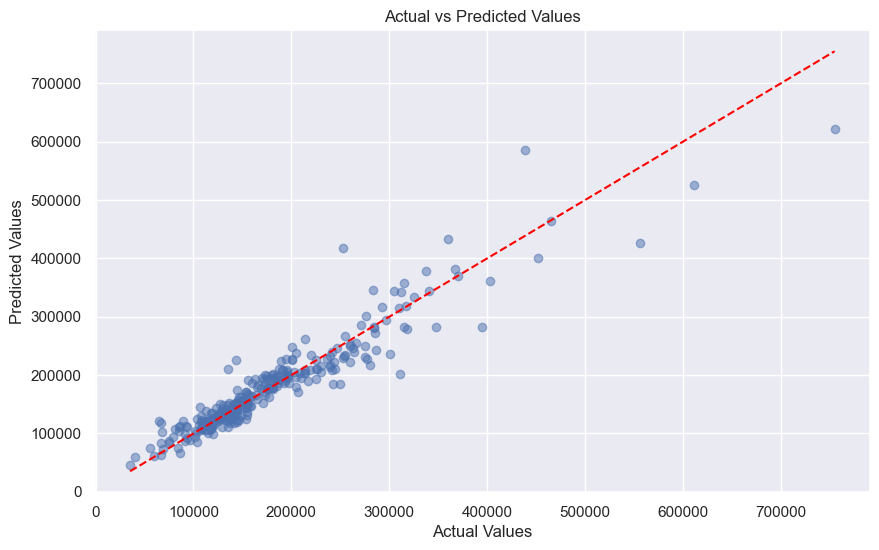

In [135]:
def plot_regression_results(model_path, X_test, y_test):
    """
    Load the regression model and plot y_test and y_pred images.

    Parameters:
    model_path (str): The path to store the model.
    X_test (array-like): indicates the characteristics of the test data.
    y_test (array-like): indicates the true value of the test data.
    """
    # Load model
    model = joblib.load(model_path)
    
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

model_path = './model/best_ridge_model_degree5.pkl'
plot_regression_results(model_path, X_test, y_test)


Trend Analysis: From the graph, it can be seen that the data points roughly follow the red dashed line (the ideal y=x line), indicating a strong positive correlation between the model's predicted values and the actual values.

Accuracy Assessment: Most data points are close to the red dashed line, indicating that the model has high accuracy in predicting the majority of house prices. However, some data points deviate significantly from the line, suggesting that the model has larger prediction errors in certain cases.

Outliers: There are some outliers in the top right corner of the graph, far from the ideal y=x line, indicating a decrease in the model's prediction accuracy in extreme house price scenarios.

Density Distribution: Data points are densely clustered near the origin and in the mid to low price range (between 0 and 300,000), suggesting a larger number of data samples in this range, with the model performing reliably within this range.

Recommendations for Improvement: To enhance the model's accuracy, especially in high price regions, adjustments to the model or the adoption of more complex regression algorithms may be necessary. Additionally, addressing outliers and increasing the diversity of the dataset can further improve the model's performance.

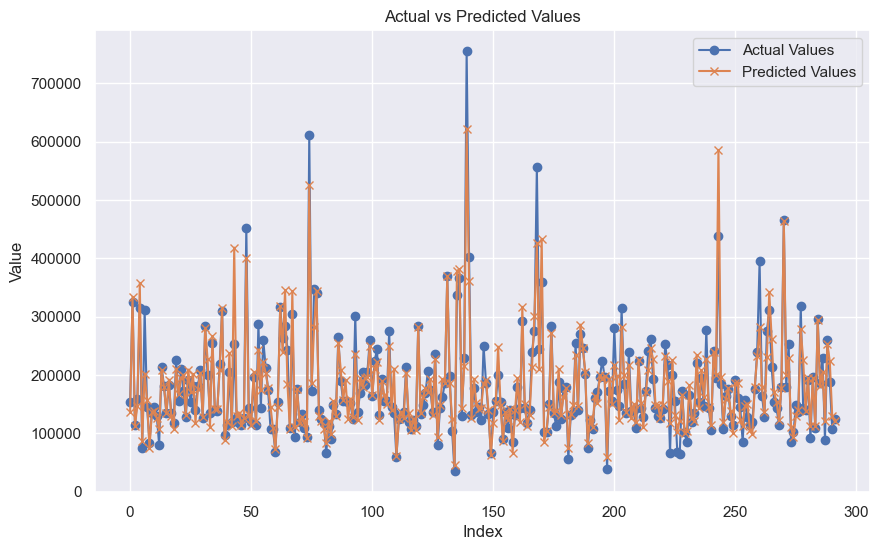

In [137]:
def plot_regression_line_chart(model_path, X_test, y_test, title='Actual vs Predicted Values', xlabel='Index', ylabel='Value'):
    """
    Load the regression model and draw line diagrams of the actual and predicted values.

    Parameters:
    model_path (str): The path to store the model.
    X_test (array-like): indicates the characteristics of the test data.
    y_test (array-like): indicates the true value of the test data.
    title (str): chart title.
    xlabel (str): X-axis label.
    ylabel (str): indicates the Y-axis label.
    """

    model = joblib.load(model_path)
    
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o')
    plt.plot(range(len(y_test)), y_pred, label='Predicted Values', marker='x')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_regression_line_chart(model_path, X_test, y_test)


The graph illustrates the variation of actual values and predicted values with index. Here are some analysis results:

Model's Predictive Ability: The graph shows that in most cases, the predicted values (orange crosses) are close to the actual values (blue dots), indicating that the model can predict house prices well in the majority of cases.

Fluctuation Analysis: The graph displays significant fluctuations in both actual and predicted values, particularly at certain points (e.g., around index 150). This variability suggests that the dataset may contain outliers or extreme values that significantly impact the model's predictions.

Error Analysis: While most predicted values are close to the actual values, there are also noticeable errors. For instance, some points have predicted values significantly lower than the actual values, while others have predicted values significantly higher. These errors may result from the model's inability to capture all factors affecting house prices or the presence of outliers in the dataset.

Consistency Analysis: Overall, there is a certain consistency between the model's predicted values and the actual values across the entire index range, but significant deviations exist at specific points. This may indicate shortcomings in the model's predictive capability under certain conditions.

Recommendations for Improvement: To enhance the model's predictive accuracy, the following aspects can be considered:

Including more features to comprehensively describe factors influencing house prices.
Employing more complex regression algorithms or ensemble models for prediction to improve overall predictive capability.

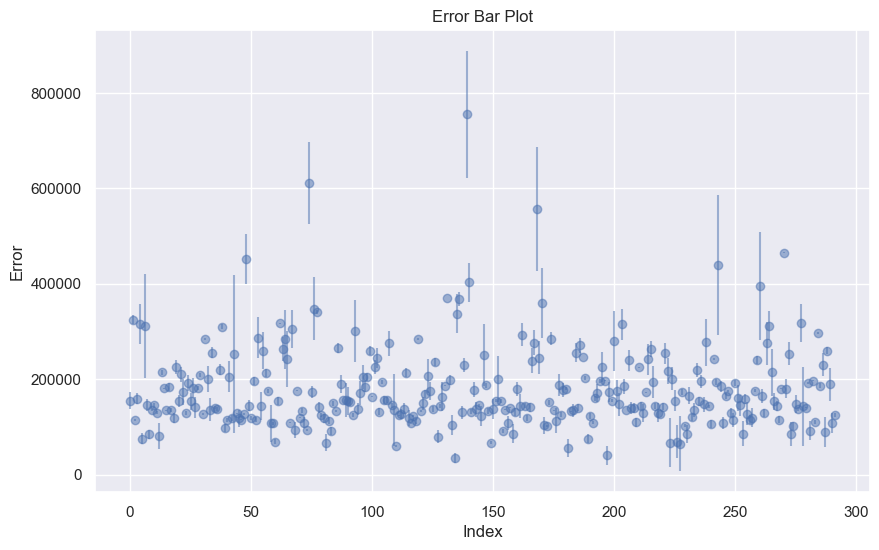

In [144]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

def plot_error_bars(model_path, X_test, y_test, xlabel='Index', ylabel='Error'):
    """
    Plot error bars.

    Parameters:
    model_path (str): Path to the stored model.
    X_test (array-like): Features of the test data.
    y_test (array-like): True values of the test data.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    """
    # Load the model
    model = joblib.load(model_path)
    
    # Make predictions using the model
    y_pred = model.predict(X_test)
    
    # Calculate prediction errors
    errors = np.abs(y_test - y_pred)
    
    # Plot error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(range(len(y_test)), y_test, yerr=errors, fmt='o', alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Error Bar Plot')
    plt.grid(True)
    plt.show()
plot_error_bars(model_path, X_test, y_test)

The graph illustrates the error between actual and predicted values (Error Bar Plot), and here are some analysis results:

Error Range: The graph indicates that the majority of data points have errors concentrated between 0 and 200,000. However, some data points have errors far exceeding this range, with the highest reaching above 800,000. This suggests that the model's prediction errors can be quite significant in certain cases.

Error Distribution: The errors are relatively evenly distributed within the index range of 0 to 300, but there are significant increases in errors at specific index points. For instance, errors are notably high around index values close to 150 and 250, possibly correlated to extreme values in these points.

Outliers: Large errors in certain areas may be attributed to the abnormal distribution of housing prices in reality.

Clustered Error Regions: Despite the presence of some extreme error values, most errors are clustered, indicating that the model performs relatively stable and reliably in the majority of cases.

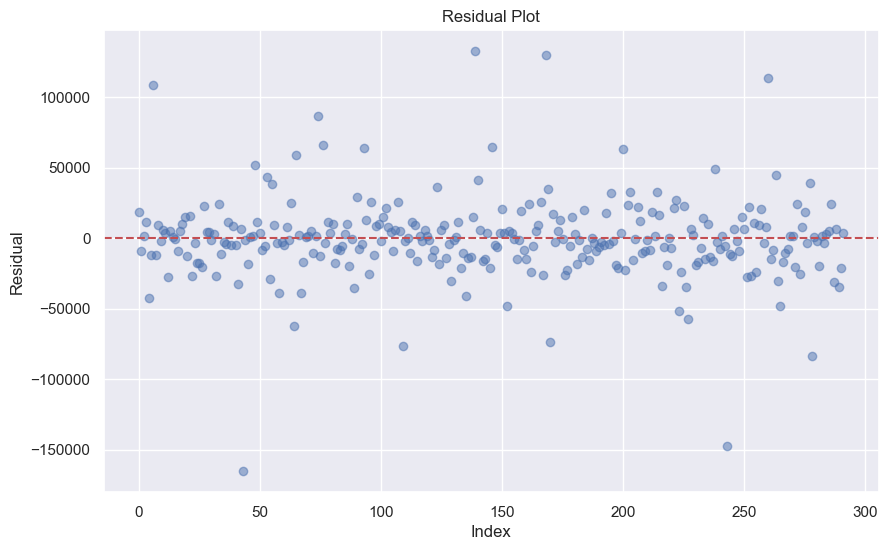

In [143]:
def plot_residuals(model_path, X_test, y_test, xlabel='Index', ylabel='Residual'):
    """
    Plot residuals.

    Parameters:
    model_path (str): Path to the stored model.
    X_test (array-like): Features of the test data.
    y_test (array-like): True values of the test data.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    """
    # Load the model
    model = joblib.load(model_path)
    
    # Make predictions using the model
    y_pred = model.predict(X_test)
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Residual Plot')
    plt.grid(True)
    plt.show()

plot_residuals(model_path, X_test, y_test)


This residual plot illustrates the difference between actual values and predicted values. Here is an analysis of the chart:

Residual distribution: From the graph, it can be observed that the majority of residuals are clustered around zero, indicating that the model can predict house prices quite accurately in most cases with relatively small prediction errors.

Homogeneity: The residuals are fairly evenly distributed within the range of indexes 0 to 300, without any clear systematic bias or patterns. This suggests that the model's prediction errors do not vary with the order of data points, meaning the errors are randomly distributed.

Outliers: While most residuals concentrate around zero, there are still some extreme residual values, especially with some residuals exceeding 100,000. These outliers could be due to anomalies or instances where the model's predictive ability is relatively poor.

# Conclusion

Overall, our regression model is roughly able to accurately predict house prices, but there is an issue with the distribution of outliers in real house prices. If we directly handle these outliers, we might lose the ability to accurately predict specific house prices in the real world. However, if we don't address these outliers, our model will suffer from significant errors. This situation presents a dilemma for us.

In the current model, while most predicted values are close to the actual values, some data points show significant deviations. These deviations are primarily found in the extreme high and low house price ranges. To improve the overall accuracy of the model, we can consider the following approaches:

Handling Outliers: Using robust statistical methods (such as median regression) or specialized outlier detection algorithms (like Local Outlier Factor) to identify and handle outliers. This can reduce the impact of outliers on the model while preserving the overall characteristics of the data.

Adding Features: Incorporating more relevant features to better capture the factors influencing house prices. For example, adding features such as location, house type, year built, and nearby amenities. These features can help the model more accurately predict house prices, especially in extreme cases.

Model Optimization: Adopting more complex regression models or ensemble models (such as Random Forest Regression, Gradient Boosting, XGBoost, etc.) to improve prediction accuracy. These models can better capture complex relationships within the data, thereby enhancing overall predictive performance.

Data Augmentation: Using data augmentation techniques (such as generating synthetic data and increasing the sample size) to expand the training dataset and improve the model's generalization ability.

Ensemble of Models: Utilizing multiple regression models for ensemble predictions. Methods such as weighted averaging and voting mechanisms can improve the robustness and accuracy of predictions. This approach effectively reduces the prediction error of individual models.

Looking ahead, we hope for the emergence of more advanced regression models that can perform exceptionally well in handling complex situations and outliers. These models should not only provide high-accuracy predictions in most cases but also effectively manage extreme values and outliers, thus enhancing their application value in the real world.

By continuously optimizing and improving, we believe we can gradually enhance the predictive capabilities of regression models, ensuring they perform more stably and accurately under various conditions, and thereby provide more reliable tools and methods for house price prediction.